# Master Notebook
## The goals and purposes of this notebook are the following
- collect mlb player offensive data from 2000-2020 using sports reference API
- Compile all player offensive data into large dataframe for EDA,analysis,modeling
- Clean and prepare Dataframe for analysis and Modeling
- Conduct EDA and Stat Testing to gain more insight into data
- Use Clustering as a feature enginerring technique to help improve regression models
- Build models with different paramters to determine best performing model
- Select Final Model and conduct model analysis

In [250]:
import numpy as np  #importing necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sportsreference.mlb.roster import Player
from sportsreference.mlb.roster import Roster
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats as scs
sns.set(style="whitegrid")
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization

In [2]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display #function to check loop progress

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [3]:
def plotLearningCurve(history,epochs): #function to show model learning 
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['root_mean_squared_error'])
  plt.plot(epochRange,history.history['val_root_mean_squared_error'])
  plt.title('Model Root Mean Square Error')
  plt.xlabel('Epoch')
  plt.ylabel('Root Mean Square Error')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()b

# The next 30 cells are seperated by team as player data was scraped from each team's roster.

# Arizona

In [32]:
Arz_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Arz_roster_2000_2020.append(Roster('ARI',year=i))

In [40]:
arz_dfs_2000_2020=[]
for i in log_progress(range(len(Arz_roster_2000_2020)),every=1):
    for player in Arz_roster_2000_2020[i].players:
        arz_dfs_2000_2020.append((player.dataframe,player.name))

In [50]:
ARZ_dfs_2000_2020=[]
for x in arz_dfs_2000_2020:
    if arz_dfs_2000_2020.count(x[1])>1:
        pass
    else:
        ARZ_dfs_2000_2020.append(x)

In [60]:
 Arz_dfs=[]
for i in log_progress(range(len(ARZ_dfs_2000_2020)),every=1):
    Arz_dfs.append(ARZ_dfs_2000_2020[i][0])

In [76]:
Arz_dfs_df=pd.concat(Arz_dfs)

In [77]:
print(Arz_dfs_df.shape)
Arz_dfs_df.to_csv('Arizona_Roster_2000_2020.csv')

(9648, 92)


# Atlanta

In [70]:
Atl_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Atl_roster_2000_2020.append(Roster('ATL',year=i))

In [71]:
ATL_dfs_2000_2020=[]
for i in log_progress(range(len(Atl_roster_2000_2020)),every=1):
    for player in Atl_roster_2000_2020[i].players:
        ATL_dfs_2000_2020.append(player.dataframe)

In [78]:
Atl_dfs_df=pd.concat(ATL_dfs_2000_2020)

In [79]:
print(Atl_dfs_df.shape)
Atl_dfs_df.to_csv('Atlanta_Roster_2000_2020.csv')

(9861, 92)


# Baltimore

In [81]:
Bal_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Bal_roster_2000_2020.append(Roster('BAL',year=i))

In [82]:
Bal_dfs_2000_2020=[]
for i in log_progress(range(len(Bal_roster_2000_2020)),every=1):
    for player in Bal_roster_2000_2020[i].players:
        Bal_dfs_2000_2020.append(player.dataframe)

In [83]:
Bal_dfs_df=pd.concat(Bal_dfs_2000_2020)

In [84]:
print(Bal_dfs_df.shape)
Bal_dfs_df.to_csv('Baltimore_Roster_2000_2020.csv')

(9295, 92)


# Boston

In [85]:
Bos_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Bos_roster_2000_2020.append(Roster('BOS',year=i))

In [86]:
Bos_dfs_2000_2020=[]
for i in log_progress(range(len(Bos_roster_2000_2020)),every=1):
    for player in Bos_roster_2000_2020[i].players:
        Bos_dfs_2000_2020.append(player.dataframe)

In [87]:
Bos_dfs_df=pd.concat(Bos_dfs_2000_2020)

In [88]:
print(Bos_dfs_df.shape)
Bos_dfs_df.to_csv('Boston_Roster_2000_2020.csv')

(10718, 92)


# Chicago Cubs

In [91]:
Chc_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Chc_roster_2000_2020.append(Roster('CHC',year=i))

In [92]:
Chc_dfs_2000_2020=[]
for i in log_progress(range(len(Chc_roster_2000_2020)),every=1):
    for player in Chc_roster_2000_2020[i].players:
        Chc_dfs_2000_2020.append(player.dataframe)

In [93]:
Chc_dfs_df=pd.concat(Chc_dfs_2000_2020)

In [94]:
print(Chc_dfs_df.shape)
Chc_dfs_df.to_csv('Chicago_Cubs_Roster_2000_2020.csv')

(9692, 92)


# Chicago Whitesox

In [95]:
Chw_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Chw_roster_2000_2020.append(Roster('CHW',year=i))

In [96]:
Chw_dfs_2000_2020=[]
for i in log_progress(range(len(Chw_roster_2000_2020)),every=1):
    for player in Chw_roster_2000_2020[i].players:
        Chw_dfs_2000_2020.append(player.dataframe)

In [97]:
Chw_dfs_df=pd.concat(Chw_dfs_2000_2020)

In [98]:
print(Chw_dfs_df.shape)
Chw_dfs_df.to_csv('Chicago_Whitesox_Roster_2000_2020.csv')

(8851, 92)


# Cincinnatti

In [100]:
Cinn_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    try:
        Cinn_roster_2000_2020.append(Roster('CIN',year=i))
    except KeyError:
        pass

In [101]:
Cinn_dfs_2000_2020=[]
for i in log_progress(range(len(Cinn_roster_2000_2020)),every=1):
    for player in Cinn_roster_2000_2020[i].players:
        Cinn_dfs_2000_2020.append(player.dataframe)

In [102]:
Cinn_dfs_df=pd.concat(Cinn_dfs_2000_2020)

In [103]:
print(Cinn_dfs_df.shape)
Cinn_dfs_df.to_csv('Cincinnatti_Roster_2000_2020.csv')

(8740, 92)


# Cleveland

In [104]:
Cle_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Cle_roster_2000_2020.append(Roster('CLE',year=i))

In [105]:
Cle_dfs_2000_2020=[]
for i in log_progress(range(len(Cle_roster_2000_2020)),every=1):
    for player in Cle_roster_2000_2020[i].players:
        Cle_dfs_2000_2020.append(player.dataframe)

In [106]:
Cle_dfs_df=pd.concat(Cle_dfs_2000_2020)

In [107]:
print(Cle_dfs_df.shape)
Cle_dfs_df.to_csv('Cleveland_Roster_2000_2020.csv')

(9946, 92)


# Colorado

In [109]:
Col_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    try:
        Col_roster_2000_2020.append(Roster('COL',year=i))
    except KeyError:
        pass

In [110]:
Col_dfs_2000_2020=[]
for i in log_progress(range(len(Col_roster_2000_2020)),every=1):
    for player in Col_roster_2000_2020[i].players:
        Col_dfs_2000_2020.append(player.dataframe)

In [111]:
Col_dfs_df=pd.concat(Col_dfs_2000_2020)

In [112]:
print(Col_dfs_df.shape)
Col_dfs_df.to_csv('Colorado_Roster_2000_2020.csv')

(8961, 92)


# Detroit

In [113]:
Det_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Det_roster_2000_2020.append(Roster('DET',year=i))

In [114]:
Det_dfs_2000_2020=[]
for i in log_progress(range(len(Det_roster_2000_2020)),every=1):
    for player in Det_roster_2000_2020[i].players:
        Det_dfs_2000_2020.append(player.dataframe)

In [115]:
Det_dfs_df=pd.concat(Det_dfs_2000_2020)

In [116]:
print(Det_dfs_df.shape)
Det_dfs_df.to_csv('Detroit_Roster_2000_2020.csv')

(8899, 92)


# Houston

In [117]:
Hou_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Hou_roster_2000_2020.append(Roster('HOU',year=i))

In [118]:
Hou_dfs_2000_2020=[]
for i in log_progress(range(len(Hou_roster_2000_2020)),every=1):
    for player in Hou_roster_2000_2020[i].players:
        Hou_dfs_2000_2020.append(player.dataframe)

In [119]:
Hou_dfs_df=pd.concat(Hou_dfs_2000_2020)

In [120]:
print(Hou_dfs_df.shape)
Hou_dfs_df.to_csv('Houston_Roster_2000_2020.csv')

(8787, 92)


# Kansas City

In [121]:
KC_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    KC_roster_2000_2020.append(Roster('KCR',year=i))

In [122]:
KC_dfs_2000_2020=[]
for i in log_progress(range(len(KC_roster_2000_2020)),every=1):
    for player in KC_roster_2000_2020[i].players:
        KC_dfs_2000_2020.append(player.dataframe)

In [123]:
KC_dfs_df=pd.concat(KC_dfs_2000_2020)

In [124]:
print(KC_dfs_df.shape)
KC_dfs_df.to_csv('KC_Roster_2000_2020.csv')

(9099, 92)


# Los Angeles Angels

In [131]:
LAA_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2005),every=1):
    LAA_roster_2000_2020.append(Roster('ANA',year=i))
for i in log_progress(np.arange(2005,2021),every=1): 
    LAA_roster_2000_2020.append(Roster('LAA',year=i))

In [132]:
LAA_dfs_2000_2020=[]
for i in log_progress(range(len(LAA_roster_2000_2020)),every=1):
    for player in LAA_roster_2000_2020[i].players:
        LAA_dfs_2000_2020.append(player.dataframe)

In [133]:
LAA_dfs_df=pd.concat(LAA_dfs_2000_2020)

In [134]:
print(LAA_dfs_df.shape)
LAA_dfs_df.to_csv('LA_Angels_Roster_2000_2020.csv')

(9436, 92)


# Los Angeles Dodgers

In [135]:
LAD_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    LAD_roster_2000_2020.append(Roster('LAD',year=i))

In [140]:
LAD_dfs_2000_2020=[]
for i in log_progress(range(len(LAD_roster_2000_2020)),every=1):
    for player in LAD_roster_2000_2020[i].players:
        LAD_dfs_2000_2020.append(player.dataframe)

In [141]:
LAD_dfs_df=pd.concat(LAD_dfs_2000_2020)

In [142]:
print(LAD_dfs_df.shape)
LAD_dfs_df.to_csv('LA_Dodgers_Roster_2000_2020.csv')

(10247, 92)


# Miami

In [143]:
MIA_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2012),every=1):
    MIA_roster_2000_2020.append(Roster('FLA',year=i))
for i in log_progress(np.arange(2012,2021),every=1):
    MIA_roster_2000_2020.append(Roster('MIA',year=i))    

In [144]:
MIA_dfs_2000_2020=[]
for i in log_progress(range(len(MIA_roster_2000_2020)),every=1):
    for player in MIA_roster_2000_2020[i].players:
        MIA_dfs_2000_2020.append(player.dataframe)

In [145]:
MIA_dfs_df=pd.concat(MIA_dfs_2000_2020)

In [146]:
print(MIA_dfs_df.shape)
MIA_dfs_df.to_csv('Miami_Roster_2000_2020.csv')

(8976, 92)


# Milwaukee

In [6]:
MIL_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    MIL_roster_2000_2020.append(Roster('MIL',year=i))

In [7]:
MIL_dfs_2000_2020=[]
for i in log_progress(range(len(MIL_roster_2000_2020)),every=1):
    for player in MIL_roster_2000_2020[i].players:
        MIL_dfs_2000_2020.append(player.dataframe)

In [8]:
MIL_dfs_df=pd.concat(MIL_dfs_2000_2020)

In [9]:
print(MIL_dfs_df.shape)
MIL_dfs_df.to_csv('Milwaukee_Roster_2000_2020.csv')

(8841, 92)


# Minnesota

In [10]:
Minn_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Minn_roster_2000_2020.append(Roster('MIN',year=i))

In [11]:
Minn_dfs_2000_2020=[]
for i in log_progress(range(len(Minn_roster_2000_2020)),every=1):
    for player in Minn_roster_2000_2020[i].players:
        Minn_dfs_2000_2020.append(player.dataframe)

In [12]:
Minn_dfs_df=pd.concat(Minn_dfs_2000_2020)

In [13]:
print(Minn_dfs_df.shape)
Minn_dfs_df.to_csv('Minnesota_Roster_2000_2020.csv')

(8823, 92)


# New York Mets

In [14]:
NYM_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    NYM_roster_2000_2020.append(Roster('NYM',year=i))

In [15]:
NYM_dfs_2000_2020=[]
for i in log_progress(range(len(NYM_roster_2000_2020)),every=1):
    for player in NYM_roster_2000_2020[i].players:
        NYM_dfs_2000_2020.append(player.dataframe)

In [16]:
NYM_dfs_df=pd.concat(NYM_dfs_2000_2020)

In [17]:
print(NYM_dfs_df.shape)
NYM_dfs_df.to_csv('NY_Mets_Roster_2000_2020.csv')

(10219, 92)


# New York Yankees 

In [18]:
NYY_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    NYY_roster_2000_2020.append(Roster('NYY',year=i))

In [19]:
NYY_dfs_2000_2020=[]
for i in log_progress(range(len(NYY_roster_2000_2020)),every=1):
    for player in NYY_roster_2000_2020[i].players:
        NYY_dfs_2000_2020.append(player.dataframe)

In [20]:
NYY_dfs_df=pd.concat(NYY_dfs_2000_2020)

In [21]:
print(NYY_dfs_df.shape)
NYY_dfs_df.to_csv('NY_Yankees_Roster_2000_2020.csv')

(11302, 92)


# Oakland

In [23]:
Oak_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    try:
        Oak_roster_2000_2020.append(Roster('OAK',year=i))
    except KeyError:
        pass

In [25]:
OAK_dfs_2000_2020=[]
for i in log_progress(range(len(Oak_roster_2000_2020)),every=1):
    for player in Oak_roster_2000_2020[i].players:
        OAK_dfs_2000_2020.append(player.dataframe)

In [26]:
Oak_dfs_df=pd.concat(OAK_dfs_2000_2020)

In [27]:
print(Oak_dfs_df.shape)
Oak_dfs_df.to_csv('Oakland_Roster_2000_2020.csv')

(8671, 92)


# Philadelphia

In [28]:
Phi_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Phi_roster_2000_2020.append(Roster('PHI',year=i))

In [29]:
Phi_dfs_2000_2020=[]
for i in log_progress(range(len(Phi_roster_2000_2020)),every=1):
    for player in Phi_roster_2000_2020[i].players:
        Phi_dfs_2000_2020.append(player.dataframe)

In [30]:
PHI_dfs_df=pd.concat(Phi_dfs_2000_2020)

In [31]:
print(PHI_dfs_df.shape)
PHI_dfs_df.to_csv('Philadelphia_Roster_2000_2020.csv')

(9624, 92)


# Pittsburgh

In [32]:
Pitt_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Pitt_roster_2000_2020.append(Roster('PIT',year=i))

In [33]:
Pitt_dfs_2000_2020=[]
for i in log_progress(range(len(Pitt_roster_2000_2020)),every=1):
    for player in Pitt_roster_2000_2020[i].players:
        Pitt_dfs_2000_2020.append(player.dataframe)

In [34]:
Pitt_dfs_df=pd.concat(Pitt_dfs_2000_2020)

In [35]:
print(Pitt_dfs_df.shape)
Pitt_dfs_df.to_csv('Pittsburgh_Roster_2000_2020.csv')

(8882, 92)


# San Diego

In [36]:
SD_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    SD_roster_2000_2020.append(Roster('SDP',year=i))

In [37]:
SD_dfs_2000_2020=[]
for i in log_progress(range(len(SD_roster_2000_2020)),every=1):
    for player in SD_roster_2000_2020[i].players:
        SD_dfs_2000_2020.append(player.dataframe)

In [38]:
SD_dfs_df=pd.concat(SD_dfs_2000_2020)

In [39]:
print(SD_dfs_df.shape)
SD_dfs_df.to_csv('San_Diego_Roster_2000_2020.csv')

(9397, 92)


# Seattle

In [40]:
Sea_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Sea_roster_2000_2020.append(Roster('SEA',year=i))

In [41]:
Sea_dfs_2000_2020=[]
for i in log_progress(range(len(Sea_roster_2000_2020)),every=1):
    for player in Sea_roster_2000_2020[i].players:
        Sea_dfs_2000_2020.append(player.dataframe)

In [42]:
SEA_dfs_df=pd.concat(Sea_dfs_2000_2020)

In [43]:
print(SEA_dfs_df.shape)
SEA_dfs_df.to_csv('Seattle_Roster_2000_2020.csv')

(9564, 92)


# San Francisco

In [44]:
SF_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    SF_roster_2000_2020.append(Roster('SFG',year=i))

In [45]:
SF_dfs_2000_2020=[]
for i in log_progress(range(len(SF_roster_2000_2020)),every=1):
    for player in SF_roster_2000_2020[i].players:
        SF_dfs_2000_2020.append(player.dataframe)

In [46]:
SF_dfs_df=pd.concat(SF_dfs_2000_2020)

In [47]:
print(SF_dfs_df.shape)
SF_dfs_df.to_csv('San_Francisco_Roster_2000_2020.csv')

(9323, 92)


# St. Louis

In [48]:
Stl_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Stl_roster_2000_2020.append(Roster('STL',year=i))

In [49]:
Stl_dfs_2000_2020=[]
for i in log_progress(range(len(Stl_roster_2000_2020)),every=1):
    for player in Stl_roster_2000_2020[i].players:
        Stl_dfs_2000_2020.append(player.dataframe)

In [50]:
Stl_dfs_df=pd.concat(Stl_dfs_2000_2020)

In [51]:
print(Stl_dfs_df.shape)
Stl_dfs_df.to_csv('St_Louis_Roster_2000_2020.csv')

(9091, 92)


# Tampa Bay

In [52]:
Tb_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2008),every=1):
    Tb_roster_2000_2020.append(Roster('TBD',year=i))
for i in log_progress(np.arange(2008,2021),every=1):
    Tb_roster_2000_2020.append(Roster('TBR',year=i))

In [53]:
Tb_dfs_2000_2020=[]
for i in log_progress(range(len(Tb_roster_2000_2020)),every=1):
    for player in Tb_roster_2000_2020[i].players:
        Tb_dfs_2000_2020.append(player.dataframe)

In [54]:
TB_dfs_df=pd.concat(Tb_dfs_2000_2020)

In [55]:
print(TB_dfs_df.shape)
TB_dfs_df.to_csv('Tampa_Bay_Roster_2000_2020.csv')

(8869, 92)


# Texas

In [56]:
Texas_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Texas_roster_2000_2020.append(Roster('TEX',year=i))

In [57]:
Texas_dfs_2000_2020=[]
for i in log_progress(range(len(Texas_roster_2000_2020)),every=1):
    for player in Texas_roster_2000_2020[i].players:
        Texas_dfs_2000_2020.append(player.dataframe)

In [58]:
TEX_dfs_df=pd.concat(Texas_dfs_2000_2020)

In [59]:
print(TEX_dfs_df.shape)
TEX_dfs_df.to_csv('Texas_Roster_2000_2020.csv')

(10416, 92)


# Toronto

In [60]:
Toronto_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2021),every=1):
    Toronto_roster_2000_2020.append(Roster('TOR',year=i))

In [61]:
Toronto_dfs_2000_2020=[]
for i in log_progress(range(len(Texas_roster_2000_2020)),every=1):
    for player in Texas_roster_2000_2020[i].players:
        Toronto_dfs_2000_2020.append(player.dataframe)

In [62]:
Toronto_dfs_df=pd.concat(Toronto_dfs_2000_2020)

In [63]:
print(Toronto_dfs_df.shape)
Toronto_dfs_df.to_csv('Toronto_Roster_2000_2020.csv')

(10416, 92)


# Washington

In [64]:
WSN_roster_2000_2020=[]
for i in log_progress(np.arange(2000,2005),every=1):
    WSN_roster_2000_2020.append(Roster('MON',year=i))
for i in log_progress(np.arange(2005,2021),every=1):
    WSN_roster_2000_2020.append(Roster('WSN',year=i))

In [65]:
WSN_dfs_2000_2020=[]
for i in log_progress(range(len(WSN_roster_2000_2020)),every=1):
    for player in WSN_roster_2000_2020[i].players:
        WSN_dfs_2000_2020.append(player.dataframe)

In [66]:
WSN_dfs_df=pd.concat(WSN_dfs_2000_2020)

In [67]:
print(WSN_dfs_df.shape)
WSN_dfs_df.to_csv('Washington_Roster_2000_2020.csv')

(9352, 92)


# Combining Dataframes together

In [495]:
Mlb_Rosters=['Arizona_Roster_2000_2020.csv','Atlanta_Roster_2000_2020.csv','Baltimore_Roster_2000_2020.csv',
'Boston_Roster_2000_2020.csv','Chicago_Cubs_Roster_2000_2020.csv','Chicago_Whitesox_Roster_2000_2020.csv',
'Cincinnatti_Roster_2000_2020.csv','Cleveland_Roster_2000_2020.csv','Colorado_Roster_2000_2020.csv',
'Detroit_Roster_2000_2020.csv','Houston_Roster_2000_2020.csv','KC_Roster_2000_2020.csv',
'LA_Angels_Roster_2000_2020.csv','LA_Dodgers_Roster_2000_2020.csv','Miami_Roster_2000_2020.csv',
'Milwaukee_Roster_2000_2020.csv','Minnesota_Roster_2000_2020.csv','NY_Mets_Roster_2000_2020.csv',
'NY_Yankees_Roster_2000_2020.csv','Oakland_Roster_2000_2020.csv','Philadelphia_Roster_2000_2020.csv',
'Pittsburgh_Roster_2000_2020.csv','San_Diego_Roster_2000_2020.csv','San_Francisco_Roster_2000_2020.csv',
'Seattle_Roster_2000_2020.csv','St_Louis_Roster_2000_2020.csv','Tampa_Bay_Roster_2000_2020.csv',
'Texas_Roster_2000_2020.csv','Toronto_Roster_2000_2020.csv','Washington_Roster_2000_2020.csv']
df_list=[]
for i in log_progress(Mlb_Rosters,every=1):
    df_i=pd.read_csv(i,index_col=0)
    df_list.append(df_i)


In [496]:
len(df_list)

30

In [497]:
Mlb_Rosters_df=pd.concat(df_list)
Mlb_Rosters_df.shape

(283946, 92)

In [498]:
Mlb_Rosters_df.to_csv('Mlb_Rosters_2000_2020_unfiltered.csv')

In [499]:
df=pd.read_csv('Mlb_Rosters_2000_2020_unfiltered.csv',index_col=0)
df.head()

,assists,at_bats,bases_on_balls,batting_average,birth_date,complete_games,defensive_chances,defensive_runs_saved_above_average,defensive_runs_saved_above_average_per_innings,double_plays_turned,doubles,errors,fielding_percentage,games,games_catcher,games_center_fielder,games_designated_hitter,games_first_baseman,games_in_batting_order,games_in_defensive_lineup,games_left_fielder,games_outfielder,games_pinch_hitter,games_pinch_runner,games_pitcher,games_right_fielder,games_second_baseman,games_shortstop,games_started,games_third_baseman,grounded_into_double_plays,height,hits,home_runs,innings_played,intentional_bases_on_balls,league_fielding_percentage,league_range_factor_per_game,league_range_factor_per_nine_innings,name,nationality,on_base_percentage,on_base_plus_slugging_percentage,on_base_plus_slugging_percentage_plus,plate_appearances,player_id,position,putouts,range_factor_per_game,range_factor_per_nine_innings,runs,runs_batted_in,sacrifice_flies,sacrifice_hits,season,slugging_percentage,stolen_bases,team_abbreviation,times_caught_stealing,times_hit_by_pitch,times_struck_out,total_bases,total_fielding_runs_above_average,total_fielding_runs_above_average_per_innings,triples,weight,balks,bases_on_balls_given,bases_on_balls_given_per_nine_innings,batters_faced,batters_struckout_per_nine_innings,earned_runs_allowed,era,era_plus,fielding_independent_pitching,games_finished,hits_against_per_nine_innings,hits_allowed,home_runs_against_per_nine_innings,home_runs_allowed,intentional_bases_on_balls_given,losses,runs_allowed,saves,shutouts,strikeouts,strikeouts_thrown_per_walk,times_hit_player,whip,wild_pitches,win_percentage,wins
1997,3.0,66.0,2.0,0.273,1969-10-13,13.0,88.0,NaN,NaN,1.0,1.0,0.0,1.000,25.0,20.0,0.0,3.0,0.0,25.0,20.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,2.0,6-3,18.0,2.0,135.1,0.0,0.991,7.09,7.15,Damian Miller,United States of America,0.282,0.660,71.0,71.0,milleda02,C,85.0,4.40,5.85,5.0,13.0,3.0,0.0,1997,0.379,0.0,MIL,0.0,0.0,12.0,25.0,-1.0,-9.0,0.0,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN
1998,26.0,168.0,11.0,0.286,1969-10-13,41.0,285.0,NaN,NaN,2.0,14.0,4.0,0.986,57.0,46.0,0.0,2.0,1.0,57.0,48.0,0.0,2.0,10.0,2.0,0.0,2.0,0.0,0.0,43.0,0.0,2.0,6-3,48.0,3.0,388.1,2.0,0.990,7.47,7.51,Damian Miller,United States of America,0.337,0.783,104.0,183.0,milleda02,C,255.0,6.11,6.51,17.0,14.0,0.0,2.0,1998,0.446,1.0,MIL,0.0,2.0,43.0,75.0,-2.0,-6.0,2.0,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN
1999,61.0,296.0,19.0,0.270,1969-10-13,71.0,689.0,NaN,NaN,9.0,19.0,6.0,0.991,86.0,86.0,0.0,0.0,0.0,86.0,86.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,6.0,6-3,80.0,11.0,715.1,3.0,0.990,7.35,7.41,Damian Miller,United States of America,0.316,0.762,90.0,320.0,milleda02,C,622.0,7.94,8.59,35.0,47.0,3.0,0.0,1999,0.446,0.0,MIL,0.0,2.0,78.0,132.0,3.0,5.0,0.0,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN
2000,47.0,324.0,36.0,0.275,1969-10-13,84.0,734.0,NaN,NaN,4.0,24.0,6.0,0.992,100.0,97.0,0.0,0.0,2.0,100.0,99.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,6.0,6-3,89.0,10.0,805.2,4.0,0.990,7.38,7.45,Damian Miller,United States of America,0.347,0.788,95.0,364.0,milleda02,C,681.0,7.51,8.13,43.0,44.0,2.0,1.0,2000,0.441,2.0,MIL,2.0,1.0,74.0,143.0,9.0,13.0,0.0,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN
2001,81.0,380.0,35.0,0.271,1969-10-13,83.0,1054.0,NaN,NaN,6.0,19.0,7.0,0.993,123.0,121.0,0.0,0.0,0.0,123.0,121.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,9.0,6-3,103.0,13.0,978.0,9.0,0.992,7.65,7.74,Damian Miller,United States of America,0.337,0.761,89.0,425.0,milleda02,C,966.0,8.65,9.63,45.0,47.0,2.0,4.0,2001,0.424,0.0,MIL,1.0,4.0,80.0,161.0,3.0,4.0,0.0,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN


In [500]:
len(df.loc[df.games_pitcher==0,:])/len(df)

0.4964394638417164

In [501]:
df=df.loc[df.games_pitcher==0,:]

In [502]:
df.shape

(140962, 92)

In [503]:
df.index

Index(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006',
       ...
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020',
       'Career'],
      dtype='object', length=140962)

In [504]:
cols=df.columns[:66] #removing pitching stats

In [505]:
df=df[cols]

In [506]:
df.shape

(140962, 66)

In [507]:
df.to_csv('Mlb_Rosters_2000_2020_filtered.csv')

# Importing newly made dataframe for Data Cleaning

In [508]:
df=pd.read_csv('Mlb_Rosters_2000_2020_filtered.csv',index_col=0)
df.shape

(140962, 66)

In [114]:
df.head()

,assists,at_bats,bases_on_balls,batting_average,birth_date,complete_games,defensive_chances,defensive_runs_saved_above_average,defensive_runs_saved_above_average_per_innings,double_plays_turned,...,stolen_bases,team_abbreviation,times_caught_stealing,times_hit_by_pitch,times_struck_out,total_bases,total_fielding_runs_above_average,total_fielding_runs_above_average_per_innings,triples,weight
1997,3.0,66.0,2.0,0.273,1969-10-13,13.0,88.0,NaN,NaN,1.0,...,0.0,MIL,0.0,0.0,12.0,25.0,-1.0,-9.0,0.0,202
1998,26.0,168.0,11.0,0.286,1969-10-13,41.0,285.0,NaN,NaN,2.0,...,1.0,MIL,0.0,2.0,43.0,75.0,-2.0,-6.0,2.0,202
1999,61.0,296.0,19.0,0.270,1969-10-13,71.0,689.0,NaN,NaN,9.0,...,0.0,MIL,0.0,2.0,78.0,132.0,3.0,5.0,0.0,202
2000,47.0,324.0,36.0,0.275,1969-10-13,84.0,734.0,NaN,NaN,4.0,...,2.0,MIL,2.0,1.0,74.0,143.0,9.0,13.0,0.0,202
2001,81.0,380.0,35.0,0.271,1969-10-13,83.0,1054.0,NaN,NaN,6.0,...,0.0,MIL,1.0,4.0,80.0,161.0,3.0,4.0,0.0,202


In [115]:
df.columns

Index(['assists', 'at_bats', 'bases_on_balls', 'batting_average', 'birth_date',
       'complete_games', 'defensive_chances',
       'defensive_runs_saved_above_average',
       'defensive_runs_saved_above_average_per_innings', 'double_plays_turned',
       'doubles', 'errors', 'fielding_percentage', 'games', 'games_catcher',
       'games_center_fielder', 'games_designated_hitter',
       'games_first_baseman', 'games_in_batting_order',
       'games_in_defensive_lineup', 'games_left_fielder', 'games_outfielder',
       'games_pinch_hitter', 'games_pinch_runner', 'games_pitcher',
       'games_right_fielder', 'games_second_baseman', 'games_shortstop',
       'games_started', 'games_third_baseman', 'grounded_into_double_plays',
       'height', 'hits', 'home_runs', 'innings_played',
       'intentional_bases_on_balls', 'league_fielding_percentage',
       'league_range_factor_per_game', 'league_range_factor_per_nine_innings',
       'name', 'nationality', 'on_base_percentage',
       '

In [509]:
df_test=df.set_index('name')

In [510]:
df_test.shape

(140962, 65)

In [511]:
test_cols=['season','team_abbreviation','assists', 'at_bats', 'bases_on_balls', 'batting_average', 'birth_date',
       'complete_games', 'defensive_chances',
       'defensive_runs_saved_above_average',
       'defensive_runs_saved_above_average_per_innings', 'double_plays_turned',
       'doubles', 'errors', 'fielding_percentage', 'games', 'games_catcher',
       'games_center_fielder', 'games_designated_hitter',
       'games_first_baseman', 'games_in_batting_order',
       'games_in_defensive_lineup', 'games_left_fielder', 'games_outfielder',
       'games_pinch_hitter', 'games_pinch_runner', 'games_pitcher',
       'games_right_fielder', 'games_second_baseman', 'games_shortstop',
       'games_started', 'games_third_baseman', 'grounded_into_double_plays',
       'height', 'hits', 'home_runs', 'innings_played',
       'intentional_bases_on_balls', 'league_fielding_percentage',
       'league_range_factor_per_game', 'league_range_factor_per_nine_innings',
        'nationality', 'on_base_percentage',
       'on_base_plus_slugging_percentage',
       'on_base_plus_slugging_percentage_plus', 'plate_appearances',
       'player_id', 'position', 'putouts', 'range_factor_per_game',
       'range_factor_per_nine_innings', 'runs', 'runs_batted_in',
       'sacrifice_flies', 'sacrifice_hits','slugging_percentage',
       'stolen_bases', 'times_caught_stealing',
       'times_hit_by_pitch', 'times_struck_out', 'total_bases',
       'total_fielding_runs_above_average',
       'total_fielding_runs_above_average_per_innings', 'triples', 'weight']
df_test=df_test[test_cols]

In [512]:
df_test.tail(50)

,season,team_abbreviation,assists,at_bats,bases_on_balls,batting_average,birth_date,complete_games,defensive_chances,defensive_runs_saved_above_average,defensive_runs_saved_above_average_per_innings,double_plays_turned,doubles,errors,fielding_percentage,games,games_catcher,games_center_fielder,games_designated_hitter,games_first_baseman,games_in_batting_order,games_in_defensive_lineup,games_left_fielder,games_outfielder,games_pinch_hitter,games_pinch_runner,games_pitcher,games_right_fielder,games_second_baseman,games_shortstop,games_started,games_third_baseman,grounded_into_double_plays,height,hits,home_runs,innings_played,intentional_bases_on_balls,league_fielding_percentage,league_range_factor_per_game,league_range_factor_per_nine_innings,nationality,on_base_percentage,on_base_plus_slugging_percentage,on_base_plus_slugging_percentage_plus,plate_appearances,player_id,position,putouts,range_factor_per_game,range_factor_per_nine_innings,runs,runs_batted_in,sacrifice_flies,sacrifice_hits,slugging_percentage,stolen_bases,times_caught_stealing,times_hit_by_pitch,times_struck_out,total_bases,total_fielding_runs_above_average,total_fielding_runs_above_average_per_innings,triples,weight
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brock Holt,2012,TOT,38.0,65.0,4.0,0.292,1988-06-11,12.0,64.0,-2.0,-19.0,3.0,2.0,4.0,0.938,24.0,0.0,0.0,0.0,0.0,24.0,14.0,0.0,0.0,10.0,0.0,0.0,0.0,14.0,0.0,14.0,0.0,1.0,5-10,19.0,0.0,123.2,0.0,0.984,4.72,4.77,United States of America,0.329,0.682,90.0,72.0,holtbr01,3B,22.0,4.29,4.37,6.0,3.0,1.0,2.0,0.354,0.0,0.0,0.0,14.0,23.0,-4.0,-37.0,1.0,180
Brock Holt,2013,TOT,25.0,59.0,7.0,0.203,1988-06-11,12.0,41.0,-3.0,-24.0,4.0,2.0,2.0,0.951,26.0,0.0,0.0,1.0,0.0,26.0,23.0,0.0,0.0,1.0,4.0,0.0,0.0,5.0,0.0,17.0,20.0,0.0,5-10,12.0,0.0,151.2,0.0,0.959,2.50,2.51,United States of America,0.275,0.513,43.0,72.0,holtbr01,3B,14.0,1.95,2.31,9.0,11.0,3.0,3.0,0.237,1.0,0.0,0.0,4.0,14.0,-3.0,-23.0,0.0,180
Brock Holt,2014,TOT,1.0,449.0,33.0,0.281,1988-06-11,30.0,81.0,8.0,25.0,0.0,23.0,0.0,1.000,106.0,0.0,10.0,0.0,8.0,106.0,106.0,8.0,44.0,1.0,0.0,0.0,35.0,11.0,12.0,42.0,39.0,7.0,5-10,126.0,4.0,382.1,0.0,0.986,2.25,2.26,United States of America,0.331,0.711,99.0,492.0,holtbr01,3B,80.0,1.84,1.91,68.0,29.0,3.0,5.0,0.381,12.0,2.0,2.0,98.0,171.0,2.0,6.0,5.0,180
Brock Holt,2015,TOT,137.0,454.0,46.0,0.280,1988-06-11,40.0,208.0,2.0,6.0,32.0,27.0,4.0,0.981,129.0,0.0,2.0,1.0,8.0,129.0,125.0,14.0,35.0,6.0,2.0,0.0,21.0,58.0,11.0,49.0,33.0,7.0,5-10,127.0,2.0,431.1,0.0,0.983,4.55,4.58,United States of America,0.349,0.727,96.0,509.0,holtbr01,3B,67.0,3.52,4.26,56.0,45.0,2.0,4.0,0.379,8.0,1.0,3.0,97.0,172.0,4.0,10.0,6.0,180
Brock Holt,2016,TOT,6.0,290.0,27.0,0.255,1988-06-11,39.0,115.0,6.0,14.0,2.0,16.0,2.0,0.983,94.0,0.0,0.0,1.0,0.0,94.0,90.0,64.0,68.0,10.0,2.0,0.0,5.0,8.0,7.0,57.0,17.0,5.0,5-10,74.0,7.0,502.1,0.0,0.986,2.12,2.15,United States of America,0.322,0.705,86.0,324.0,holtbr01,3B,107.0,1.66,2.02,45.0,34.0,3.0,1.0,0.383,4.0,3.0,3.0,58.0,111.0,-5.0,-11.0,0.0,180
Brock Holt,2017,TOT,51.0,140.0,19.0,0.200,1988-06-11,16.0,93.0,1.0,6.0,9.0,6.0,2.0,0.978,64.0,0.0,0.0,3.0,2.0,64.0,53.0,10.0,11.0,10.0,9.0,0.0,2.0,31.0,0.0,17.0,9.0,3.0,5-10,28.0,0.0,188.1,0.0,0.983,4.30,4.35,United States of America,0.305,0.548,47.0,164.0,holtbr01,3B,40.0,2.94,4.35,20.0,7.0,2.0,0.0,0.243,2.0,1.0,3.0,34.0,34.0,-2.0,-11.0,0.0,180
Brock Holt,2018,TOT,91.0,321.0,37.0,0.277,1988-06-11,44.0,181.0,-2.0,-5.0,24.0,18.0,0.0,1.000,109.0,0.0,0.0,2.0,7.0,109.0,98.0,6.0,16.0,15.0,1.0,0.0,11.0,56.0,23.0,49.0,5.0,7.0,5-10,89.0,7.0,445.1,2.0,0.982,4.08,4.12,United States of America,0.362,0.774,109.0,367.0,holtbr01,3B,90.0,3.23,3.66,41.0,46.0,2.0,0.0,0.411,7.0,7.0,7.0,73.0,132.0,-3.0,-8.0,2.0,180
Brock Holt,2019,TOT,136.0,259.0,28.0,0.297,1988-06-11,35.0,216.0,3.0,8.0,27.0,14.0,2.0,0.991,87.0,0.0,0.0,1.0,11.0,87.0,82.0,4.0,9.0,12.0,1.0,0.0,6.0,60.0,6.0,56.0,4.0,4.0,5-10,77.0,3.0,469.1,1.0,0.981,4.06,4.09,United States of America,0.369,0.771,101.0,295.0,holtbr01,

In [513]:
df_test.to_csv('Mlb_Rosters_2000_2020_filtered.csv')

In [514]:
df=pd.read_csv('Mlb_Rosters_2000_2020_filtered.csv',index_col=0)
df.shape #alot of duplicates however 

(140962, 65)

In [515]:
df.reset_index(inplace=True)

In [516]:
df.dtypes

name                                               object
season                                             object
team_abbreviation                                  object
assists                                           float64
at_bats                                           float64
bases_on_balls                                    float64
batting_average                                   float64
birth_date                                         object
complete_games                                    float64
defensive_chances                                 float64
defensive_runs_saved_above_average                float64
defensive_runs_saved_above_average_per_innings    float64
double_plays_turned                               float64
doubles                                           float64
errors                                            float64
fielding_percentage                               float64
games                                             float64
games_catcher 

In [517]:
df.drop_duplicates(subset =['name','season','team_abbreviation'], 
                     keep = 'first', inplace = True) 

In [518]:
df.loc[df.name=='Damian Miller',:]

,name,season,team_abbreviation,assists,at_bats,bases_on_balls,batting_average,birth_date,complete_games,defensive_chances,defensive_runs_saved_above_average,defensive_runs_saved_above_average_per_innings,double_plays_turned,doubles,errors,fielding_percentage,games,games_catcher,games_center_fielder,games_designated_hitter,games_first_baseman,games_in_batting_order,games_in_defensive_lineup,games_left_fielder,games_outfielder,games_pinch_hitter,games_pinch_runner,games_pitcher,games_right_fielder,games_second_baseman,games_shortstop,games_started,games_third_baseman,grounded_into_double_plays,height,hits,home_runs,innings_played,intentional_bases_on_balls,league_fielding_percentage,league_range_factor_per_game,league_range_factor_per_nine_innings,nationality,on_base_percentage,on_base_plus_slugging_percentage,on_base_plus_slugging_percentage_plus,plate_appearances,player_id,position,putouts,range_factor_per_game,range_factor_per_nine_innings,runs,runs_batted_in,sacrifice_flies,sacrifice_hits,slugging_percentage,stolen_bases,times_caught_stealing,times_hit_by_pitch,times_struck_out,total_bases,total_fielding_runs_above_average,total_fielding_runs_above_average_per_innings,triples,weight
0,Damian Miller,1997,MIL,3.0,66.0,2.0,0.273,1969-10-13,13.0,88.0,NaN,NaN,1.0,1.0,0.0,1.000,25.0,20.0,0.0,3.0,0.0,25.0,20.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,2.0,6-3,18.0,2.0,135.1,0.0,0.991,7.09,7.15,United States of America,0.282,0.660,71.0,71.0,milleda02,C,85.0,4.40,5.85,5.0,13.0,3.0,0.0,0.379,0.0,0.0,0.0,12.0,25.0,-1.0,-9.0,0.0,202
1,Damian Miller,1998,MIL,26.0,168.0,11.0,0.286,1969-10-13,41.0,285.0,NaN,NaN,2.0,14.0,4.0,0.986,57.0,46.0,0.0,2.0,1.0,57.0,48.0,0.0,2.0,10.0,2.0,0.0,2.0,0.0,0.0,43.0,0.0,2.0,6-3,48.0,3.0,388.1,2.0,0.990,7.47,7.51,United States of America,0.337,0.783,104.0,183.0,milleda02,C,255.0,6.11,6.51,17.0,14.0,0.0,2.0,0.446,1.0,0.0,2.0,43.0,75.0,-2.0,-6.0,2.0,202
2,Damian Miller,1999,MIL,61.0,296.0,19.0,0.270,1969-10-13,71.0,689.0,NaN,NaN,9.0,19.0,6.0,0.991,86.0,86.0,0.0,0.0,0.0,86.0,86.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,6.0,6-3,80.0,11.0,715.1,3.0,0.990,7.35,7.41,United States of America,0.316,0.762,90.0,320.0,milleda02,C,622.0,7.94,8.59,35.0,47.0,3.0,0.0,0.446,0.0,0.0,2.0,78.0,132.0,3.0,5.0,0.0,202
3,Damian Miller,2000,MIL,47.0,324.0,36.0,0.275,1969-10-13,84.0,734.0,NaN,NaN,4.0,24.0,6.0,0.992,100.0,97.0,0.0,0.0,2.0,100.0,99.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,6.0,6-3,89.0,10.0,805.2,4.0,0.990,7.38,7.45,United States of America,0.347,0.788,95.0,364.0,milleda02,C,681.0,7.51,8.13,43.0,44.0,2.0,1.0,0.441,2.0,2.0,1.0,74.0,143.0,9.0,13.0,0.0,202
4,Damian Miller,2001,MIL,81.0,380.0,35.0,0.271,1969-10-13,83.0,1054.0,NaN,NaN,6.0,19.0,7.0,0.993,123.0,121.0,0.0,0.0,0.0,123.0,121.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,9.0,6-3,103.0,13.0,978.0,9.0,0.992,7.65,7.74,United States of America,0.337,0.761,89.0,425.0,milleda02,C,966.0,8.65,9.63,45.0,47.0,2.0,4.0,0.424,0.0,1.0,4.0,80.0,161.0,3.0,4.0,0.0,202
5,Damian Miller,2002,MIL,49.0,297.0,38.0,0.249,1969-10-13,65.0,767.0,NaN,NaN,8.0,22.0,2.0,0.997,101.0,100.0,0.0,0.0,0.0,101.0,100.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,14.0,6-3,74.0,11.0,763.0,5.0,0.991,7.47,7.53,United States of America,0.340,0.775,94.0,340.0,milleda02,C,716.0,7.65,9.02,40.0,42.0,0.0,2.0,0.434,0.0,0.0,3.0,88.0,129.0,1.0,2.0,0.0,202
6,Damian Miller,2003,MIL,73.0,352.0,39.0,0.233,1969-10-13,91.0,1016.0,0.0,0.0,6.0,19.0,3.0,0.997,114.0,114.0,0.0,0.0,0.0,114.0,114.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0,15.0,6-3,82.0,9.0,929.2,6.0,0.992,7.26,7.33,United States of America,0.310,0.680,76.0,400.0,milleda02,C,940.0,8.89,9.81,34.0,36.0,1.0,7.0,0.369,1.0,0.0,1.0,91.0,130.0,3.0,4.0,1.0,202
7,Damian Miller,2004,MIL,49.0,397.0,39.0,0.272,1969-10-13,98.0,751.0,1.0,1.0,4.0,25.0,1.0,0.999,110.0,109.0,0.0,0.0,0.0,110.0,109.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,109.0,0.0,19.0,6-3,108.0,9.0,963.2,0.0,0.992,7.07,7.12,United States of America,0.339,0.742,94.0,442.0,milleda02,C,701.0,6.88,7.00,39.0,58.0,2.0,2.0,0.40

In [519]:
df.to_csv('Mlb_Rosters_2000_2020_filtered.csv')

In [520]:
df=pd.read_csv('Mlb_Rosters_2000_2020_filtered.csv',index_col=0)
df.shape

(18451, 66)

In [521]:
df.columns

Index(['name', 'season', 'team_abbreviation', 'assists', 'at_bats',
       'bases_on_balls', 'batting_average', 'birth_date', 'complete_games',
       'defensive_chances', 'defensive_runs_saved_above_average',
       'defensive_runs_saved_above_average_per_innings', 'double_plays_turned',
       'doubles', 'errors', 'fielding_percentage', 'games', 'games_catcher',
       'games_center_fielder', 'games_designated_hitter',
       'games_first_baseman', 'games_in_batting_order',
       'games_in_defensive_lineup', 'games_left_fielder', 'games_outfielder',
       'games_pinch_hitter', 'games_pinch_runner', 'games_pitcher',
       'games_right_fielder', 'games_second_baseman', 'games_shortstop',
       'games_started', 'games_third_baseman', 'grounded_into_double_plays',
       'height', 'hits', 'home_runs', 'innings_played',
       'intentional_bases_on_balls', 'league_fielding_percentage',
       'league_range_factor_per_game', 'league_range_factor_per_nine_innings',
       'nationality',

In [522]:
df.dtypes

name                                               object
season                                             object
team_abbreviation                                  object
assists                                           float64
at_bats                                           float64
bases_on_balls                                    float64
batting_average                                   float64
birth_date                                         object
complete_games                                    float64
defensive_chances                                 float64
defensive_runs_saved_above_average                float64
defensive_runs_saved_above_average_per_innings    float64
double_plays_turned                               float64
doubles                                           float64
errors                                            float64
fielding_percentage                               float64
games                                             float64
games_catcher 

In [214]:
#dropping more unnecessary columns
df.drop(columns=['on_base_plus_slugging_percentage'],inplace=True)

# EDA/ Data Cleaning

In [524]:
corr_list=[]
for col in df.columns:
    if df[col].dtype=='float64' or df[col].dtype=='int64':
        corr_list.append((col,df.on_base_plus_slugging_percentage_plus.corr(df[col])))
    else:
        pass

In [525]:
sorted(corr_list,key=lambda x:x[1],reverse=True)

[('games_pitcher', nan),
 ('on_base_plus_slugging_percentage_plus', 1.0),
 ('on_base_plus_slugging_percentage', 0.9913819903978364),
 ('slugging_percentage', 0.9488328632078954),
 ('on_base_percentage', 0.9143379891454682),
 ('batting_average', 0.8932734929506968),
 ('home_runs', 0.21295223556490867),
 ('runs_batted_in', 0.19989934956089053),
 ('total_bases', 0.1967704032223882),
 ('bases_on_balls', 0.19341934661570412),
 ('runs', 0.19172302562144786),
 ('doubles', 0.19088891352497353),
 ('hits', 0.1844037784240133),
 ('innings_played', 0.17923458765889244),
 ('complete_games', 0.17911019494986932),
 ('games_started', 0.17631085516748785),
 ('times_struck_out', 0.17568929325956892),
 ('plate_appearances', 0.17542333349210265),
 ('at_bats', 0.1724751610259061),
 ('sacrifice_flies', 0.17234201558200382),
 ('intentional_bases_on_balls', 0.17209950369651741),
 ('grounded_into_double_plays', 0.16160686005433672),
 ('games', 0.16112826820501897),
 ('times_hit_by_pitch', 0.1609823839038096),


In [526]:
df['birth_date'].head(10)

0    1969-10-13
1    1969-10-13
2    1969-10-13
3    1969-10-13
4    1969-10-13
5    1969-10-13
6    1969-10-13
7    1969-10-13
8    1969-10-13
9    1969-10-13
Name: birth_date, dtype: object

In [529]:
df['birth_year']=df['birth_date'].apply(lambda x:int(x[:4]))

In [530]:
df['birth_year'].head(10)

0    1969
1    1969
2    1969
3    1969
4    1969
5    1969
6    1969
7    1969
8    1969
9    1969
Name: birth_year, dtype: int64

In [554]:
x=df.loc[df.season=='Career',:].index

In [555]:
df.drop(index=x,inplace=True)

In [557]:
df['season']=df.season.astype('float64')

In [558]:
df['Age']=df['season']-df['birth_year']

In [559]:
df.loc[:,['name','season','Age']].head(15)

,name,season,Age
0,Damian Miller,1997.0,28.0
1,Damian Miller,1998.0,29.0
2,Damian Miller,1999.0,30.0
3,Damian Miller,2000.0,31.0
4,Damian Miller,2001.0,32.0
5,Damian Miller,2002.0,33.0
6,Damian Miller,2003.0,34.0
7,Damian Miller,2004.0,35.0
8,Damian Miller,2005.0,36.0
9,Damian Miller,2006.0,37.0


In [560]:
df.to_csv('Mlb_Rosters_2000_2020_filtered.csv')

In [561]:
df=pd.read_csv('Mlb_Rosters_2000_2020_filtered.csv',index_col=0)
df.shape

(16111, 68)

In [ ]:
# Final Dataframe future steps

In [562]:
df.columns

Index(['name', 'season', 'team_abbreviation', 'assists', 'at_bats',
       'bases_on_balls', 'batting_average', 'birth_date', 'complete_games',
       'defensive_chances', 'defensive_runs_saved_above_average',
       'defensive_runs_saved_above_average_per_innings', 'double_plays_turned',
       'doubles', 'errors', 'fielding_percentage', 'games', 'games_catcher',
       'games_center_fielder', 'games_designated_hitter',
       'games_first_baseman', 'games_in_batting_order',
       'games_in_defensive_lineup', 'games_left_fielder', 'games_outfielder',
       'games_pinch_hitter', 'games_pinch_runner', 'games_pitcher',
       'games_right_fielder', 'games_second_baseman', 'games_shortstop',
       'games_started', 'games_third_baseman', 'grounded_into_double_plays',
       'height', 'hits', 'home_runs', 'innings_played',
       'intentional_bases_on_balls', 'league_fielding_percentage',
       'league_range_factor_per_game', 'league_range_factor_per_nine_innings',
       'nationality',

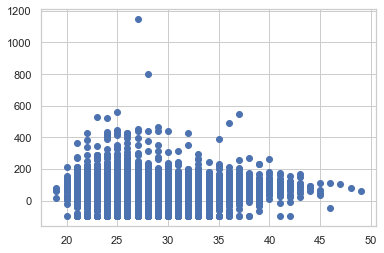

In [563]:
plt.scatter(df.Age,df['on_base_plus_slugging_percentage_plus'])

In [564]:
df['name'].unique()

array(['Damian Miller', 'Greg Colbrunn', 'Jay Bell', ..., 'Tres Barrera',
       'Luis Garcia', 'Yadiel Hernández'], dtype=object)

# Feature Engineering

In [565]:
max_ops_dict={}
for name in df['name'].unique():
    max_ops=df.loc[df['name']==name,'on_base_plus_slugging_percentage_plus'].max()
    max_ops_dict[name]=max_ops

In [566]:
max_ops_dict

{'Damian Miller': 104.0,
 'Greg Colbrunn': 148.0,
 'Jay Bell': 211.0,
 'Tony Womack': 151.0,
 'Matt Williams': 177.0,
 'Luis Gonzalez': 174.0,
 'Steve Finley': 136.0,
 'Danny Bautista': 117.0,
 'Kelly Stinnett': 116.0,
 'Travis Lee': 116.0,
 'Erubiel Durazo': 153.0,
 'Craig Counsell': 108.0,
 'Hanley Frías': 87.0,
 'Jason Conti': 88.0,
 'Lenny Harris': 132.0,
 'Andy Fox': 98.0,
 'Álex Cabrera': 94.0,
 'Danny Klassen': 408.0,
 'Bernard Gilkey': 155.0,
 'Turner Ward': 168.0,
 'David Dellucci': 145.0,
 'Rob Ryan': 104.0,
 'Rod Barajas': 98.0,
 'Matt Mieske': 114.0,
 'Mark Grace': 142.0,
 'Reggie Sanders': 155.0,
 'Junior Spivey': 117.0,
 'Chad Moeller': 114.0,
 'Mike Difelice': 106.0,
 'Midre Cummings': 120.0,
 'Álex Cintrón': 112.0,
 'Ryan Christenson': 90.0,
 'Jack Cust': 200.0,
 'Lyle Overbay': 153.0,
 'Juan Sosa': 40.0,
 'Ken Huckaby': 51.0,
 'Quinton McCracken': 107.0,
 'José Guillén': 142.0,
 'Chris Donnels': 183.0,
 'Mark Little': 111.0,
 'Félix José': 167.0,
 'Shea Hillenbrand': 1

In [567]:
df['Max_OPS+'] = df['name'].map(max_ops_dict)

In [568]:
df.columns

Index(['name', 'season', 'team_abbreviation', 'assists', 'at_bats',
       'bases_on_balls', 'batting_average', 'birth_date', 'complete_games',
       'defensive_chances', 'defensive_runs_saved_above_average',
       'defensive_runs_saved_above_average_per_innings', 'double_plays_turned',
       'doubles', 'errors', 'fielding_percentage', 'games', 'games_catcher',
       'games_center_fielder', 'games_designated_hitter',
       'games_first_baseman', 'games_in_batting_order',
       'games_in_defensive_lineup', 'games_left_fielder', 'games_outfielder',
       'games_pinch_hitter', 'games_pinch_runner', 'games_pitcher',
       'games_right_fielder', 'games_second_baseman', 'games_shortstop',
       'games_started', 'games_third_baseman', 'grounded_into_double_plays',
       'height', 'hits', 'home_runs', 'innings_played',
       'intentional_bases_on_balls', 'league_fielding_percentage',
       'league_range_factor_per_game', 'league_range_factor_per_nine_innings',
       'nationality',

In [53]:
df.loc[:,['name','season','on_base_plus_slugging_percentage_plus','Max_OPS+']].tail(10)

,name,season,on_base_plus_slugging_percentage_plus,Max_OPS+
127665,Trea Turner,2018,100.0,157.0
127666,Trea Turner,2019,116.0,157.0
127667,Trea Turner,2020,157.0,157.0
127683,Wilmer Difo,2017,78.0,97.0
127684,Wilmer Difo,2018,71.0,97.0
128053,Víctor Robles,2019,90.0,127.0
128054,Víctor Robles,2020,63.0,127.0
128109,Juan Soto,2018,142.0,212.0
128110,Juan Soto,2019,141.0,212.0
128111,Juan Soto,2020,212.0,212.0


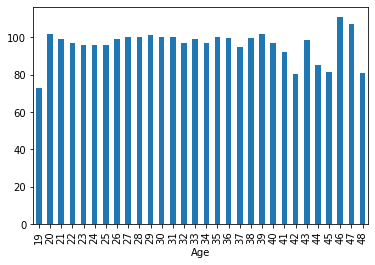

In [52]:
df.groupby('Age').median()['on_base_plus_slugging_percentage_plus'].plot(kind='bar')

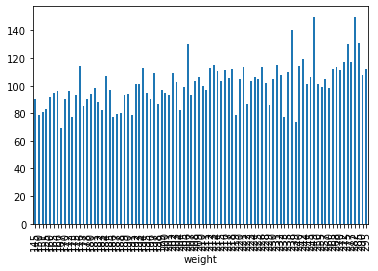

In [51]:
df.groupby('weight').median()['on_base_plus_slugging_percentage_plus'].plot(kind='bar')

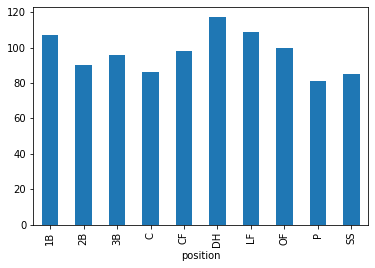

In [50]:
df.groupby('position').median()['on_base_plus_slugging_percentage_plus'].plot(kind='bar')

In [27]:
df['nationality'].unique()

array(['United States of America', 'Dominican Replubic', 'Mexico',
       'Venezuela', 'Canada', 'U.S. Virgin Islands', 'Puerto Rico',
       'Australia', 'Cuba', 'Netherlands', 'Curacao', 'Colombia',
       'Bahamas', 'Germany', 'Panama', 'Aruba', 'Nicaragua',
       'South Korea', 'Japan', 'Taiwan', 'Brazil', 'Jamaica', 'Honduras',
       'South Africa', 'Saudi Arabia', 'Belgium', 'Italy'], dtype=object)

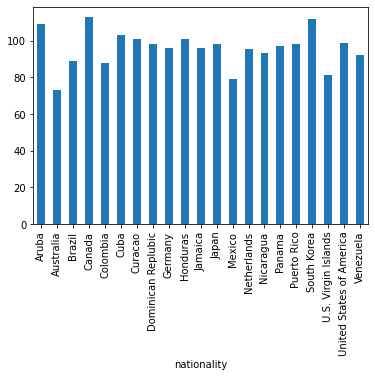

In [49]:
df.groupby('nationality').median()['on_base_plus_slugging_percentage_plus'].plot(kind='bar')

In [48]:
df['on_base_plus_slugging_percentage_plus'].values

array([104.,  90.,  95., ..., 142., 141., 212.])

In [47]:
df['on_base_plus_slugging_percentage_plus'].describe()

count    9781.000000
mean      100.012371
std        26.785686
min         5.000000
25%        82.000000
50%        99.000000
75%       117.000000
max       231.000000
Name: on_base_plus_slugging_percentage_plus, dtype: float64

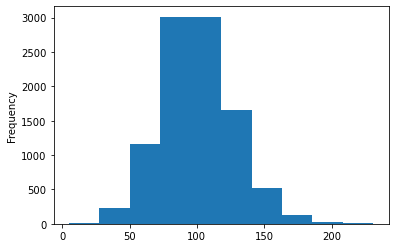

In [46]:
df['on_base_plus_slugging_percentage_plus'].plot(kind='hist')

In [21]:
df=df.loc[(df['on_base_plus_slugging_percentage_plus']>=0)&(df['on_base_plus_slugging_percentage_plus']<=250),:]

In [31]:
df.loc[df['on_base_plus_slugging_percentage_plus']==247,:]

,name,season,team_abbreviation,assists,at_bats,bases_on_balls,batting_average,birth_date,complete_games,defensive_chances,...,times_hit_by_pitch,times_struck_out,total_bases,total_fielding_runs_above_average,total_fielding_runs_above_average_per_innings,triples,weight,birth_year,Age,Max_OPS+
60526,Mike Mordecai,1994,FLA,4.0,4.0,1.0,0.25,1967-12-13,0.0,5.0,...,0.0,0.0,4.0,1.0,65.0,0.0,175,1967,27,247.0


In [33]:
df['at_bats'].describe()

count    15003.000000
mean       279.370926
std        198.530989
min          1.000000
25%         95.000000
50%        251.000000
75%        462.000000
max        716.000000
Name: at_bats, dtype: float64

In [569]:
df=df.loc[df['at_bats']>=150,:]

In [570]:
df.to_csv('Mlb_Rosters_2000_2020_filtered.csv')

In [4]:
df=pd.read_csv('Mlb_Rosters_2000_2020_filtered.csv',index_col=0)
df.shape

(9299, 75)

In [513]:
# Cleaned Dataframe

In [572]:
df.tail(10)

,name,season,team_abbreviation,assists,at_bats,bases_on_balls,batting_average,birth_date,complete_games,defensive_chances,defensive_runs_saved_above_average,defensive_runs_saved_above_average_per_innings,double_plays_turned,doubles,errors,fielding_percentage,games,games_catcher,games_center_fielder,games_designated_hitter,games_first_baseman,games_in_batting_order,games_in_defensive_lineup,games_left_fielder,games_outfielder,games_pinch_hitter,games_pinch_runner,games_pitcher,games_right_fielder,games_second_baseman,games_shortstop,games_started,games_third_baseman,grounded_into_double_plays,height,hits,home_runs,innings_played,intentional_bases_on_balls,league_fielding_percentage,league_range_factor_per_game,league_range_factor_per_nine_innings,nationality,on_base_percentage,on_base_plus_slugging_percentage,on_base_plus_slugging_percentage_plus,plate_appearances,player_id,position,putouts,range_factor_per_game,range_factor_per_nine_innings,runs,runs_batted_in,sacrifice_flies,sacrifice_hits,slugging_percentage,stolen_bases,times_caught_stealing,times_hit_by_pitch,times_struck_out,total_bases,total_fielding_runs_above_average,total_fielding_runs_above_average_per_innings,triples,weight,birth_year,Age,Max_OPS+
139999,Trea Turner,2018.0,WSN,399.0,664.0,69.0,0.271,1993-06-30,153.0,615.0,2.0,2.0,70.0,27.0,12.0,0.980,162.0,0.0,0.0,0.0,0.0,162.0,159.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,159.0,158.0,0.0,7.0,6-2,180.0,19.0,1401.0,3.0,0.973,3.95,3.96,United States of America,0.344,0.760,100.0,740.0,turnetr01,SS,204.0,3.79,3.87,103.0,73.0,0.0,2.0,0.416,43.0,9.0,5.0,132.0,276.0,-5.0,-4.0,6.0,185,1993,25.0,157.0
140000,Trea Turner,2019.0,WSN,298.0,521.0,43.0,0.298,1993-06-30,117.0,441.0,-1.0,-1.0,57.0,37.0,13.0,0.971,122.0,0.0,0.0,0.0,0.0,122.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,122.0,0.0,10.0,6-2,155.0,19.0,1065.1,2.0,0.972,3.84,3.87,United States of America,0.353,0.850,116.0,569.0,turnetr01,SS,130.0,3.51,3.62,96.0,57.0,2.0,0.0,0.497,35.0,5.0,3.0,113.0,259.0,4.0,4.0,5.0,185,1993,26.0,157.0
140001,Trea Turner,2020.0,WSN,120.0,233.0,22.0,0.335,1993-06-30,53.0,206.0,-7.0,-18.0,33.0,15.0,9.0,0.956,59.0,0.0,0.0,0.0,0.0,59.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,59.0,0.0,5.0,6-2,78.0,12.0,479.2,0.0,0.970,3.59,3.78,United States of America,0.394,0.982,157.0,259.0,turnetr01,SS,77.0,3.34,3.70,46.0,41.0,2.0,0.0,0.588,12.0,4.0,2.0,36.0,137.0,-7.0,-17.0,4.0,185,1993,27.0,157.0
140019,Wilmer Difo,2017.0,WSN,165.0,332.0,24.0,0.271,1992-04-02,51.0,247.0,9.0,23.0,24.0,10.0,6.0,0.976,124.0,0.0,1.0,1.0,0.0,124.0,91.0,2.0,6.0,31.0,7.0,0.0,3.0,25.0,57.0,52.0,6.0,7.0,5-11,90.0,5.0,473.1,6.0,0.973,4.11,4.16,Dominican Replubic,0.319,0.690,78.0,365.0,difowi01,2B,76.0,4.23,4.58,47.0,21.0,3.0,5.0,0.370,10.0,1.0,1.0,74.0,123.0,5.0,14.0,4.0,200,1992,25.0,97.0
140020,Wilmer Difo,2018.0,WSN,214.0,408.0,39.0,0.230,1992-04-02,77.0,364.0,1.0,2.0,45.0,14.0,3.0,0.992,148.0,0.0,1.0,0.0,0.0,148.0,136.0,0.0,1.0,18.0,3.0,0.0,0.0,112.0,9.0,84.0,20.0,8.0,5-11,94.0,7.0,792.1,5.0,0.982,4.29,4.31,Dominican Replubic,0.298,0.649,71.0,456.0,difowi01,2B,147.0,3.22,4.10,55.0,42.0,4.0,3.0,0.350,10.0,3.0,2.0,82.0,143.0,6.0,9.0,7.0,200,1992,26.0,97.0
140431,Víctor Robles,2019.0,WSN,12.0,546.0,35.0,0.255,1997-05-19,138.0,366.0,25.0,22.0,2.0,33.0,6.0,0.984,155.0,0.0,141.0,0.0,0.0,155.0,152.0,0.0,152.0,5.0,0.0,0.0,15.0,0.0,0.0,147.0,0.0,6.0,6-0,139.0,17.0,1308.2,3.0,0.984,2.02,2.04,Dominican Replubic,0.326,0.745,90.0,617.0,roblevi01,CF,348.0,2.37,2.48,86.0,65.0,5.0,6.0,0.419,28.0,9.0,25.0,140.0,229.0,4.0,4.0,3.0,205,1997,22.0,127.0
140432,Víctor Robles,2020.0,WSN,1.0,168.0,9.0,0.220,1997-05-19,48.0,122.0,-4.0,-11.0,1.0,5.0,0.0,1.000,52.0,0.0,52.0,0.0,0.0,52.0,52.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,6-0,37.0,3.0,422.2,0.0,0.991,2.22,2.34,Dominican Replubic,0.293,0.608,63.0,189.0,roblevi01,CF,121.0,2.35,2.60,20.0,15.0,2.0,1.0,0.315,4.0,1.0,9.0,53.0,53.0,-3.0,-10.0,1.0,205,1997,23.0,127.0
140495,Juan Soto,2018.0,WSN,4.0,414.0,79.0,0.292,1998-10-25,107.0,213.0,-6.0,-7.0,2.0,25.0,2.0,0.991

In [573]:
df.columns

Index(['name', 'season', 'team_abbreviation', 'assists', 'at_bats',
       'bases_on_balls', 'batting_average', 'birth_date', 'complete_games',
       'defensive_chances', 'defensive_runs_saved_above_average',
       'defensive_runs_saved_above_average_per_innings', 'double_plays_turned',
       'doubles', 'errors', 'fielding_percentage', 'games', 'games_catcher',
       'games_center_fielder', 'games_designated_hitter',
       'games_first_baseman', 'games_in_batting_order',
       'games_in_defensive_lineup', 'games_left_fielder', 'games_outfielder',
       'games_pinch_hitter', 'games_pinch_runner', 'games_pitcher',
       'games_right_fielder', 'games_second_baseman', 'games_shortstop',
       'games_started', 'games_third_baseman', 'grounded_into_double_plays',
       'height', 'hits', 'home_runs', 'innings_played',
       'intentional_bases_on_balls', 'league_fielding_percentage',
       'league_range_factor_per_game', 'league_range_factor_per_nine_innings',
       'nationality',

In [574]:
df['Best_season']=np.where(df['on_base_plus_slugging_percentage_plus']==df['Max_OPS+'],1,0)

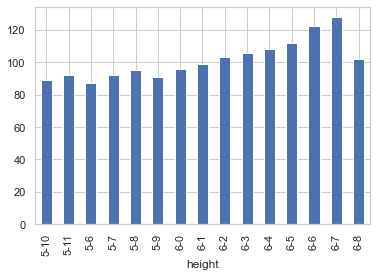

In [576]:
df.groupby('height').median()['on_base_plus_slugging_percentage_plus'].plot(kind='bar')

In [577]:
df['height'].dtypes

dtype('O')

In [582]:
df.loc[df['height']=='6-7',['name','season','Height','at_bats','on_base_plus_slugging_percentage_plus']]

,name,season,Height,at_bats,on_base_plus_slugging_percentage_plus
1355,Richie Sexson,1998.0,6.583333,174.0,135.0
1356,Richie Sexson,1999.0,6.583333,479.0,102.0
1357,Richie Sexson,2000.0,6.583333,537.0,112.0
1358,Richie Sexson,2001.0,6.583333,598.0,128.0
1359,Richie Sexson,2002.0,6.583333,570.0,128.0
1360,Richie Sexson,2003.0,6.583333,606.0,140.0
1362,Richie Sexson,2005.0,6.583333,558.0,144.0
1363,Richie Sexson,2006.0,6.583333,591.0,117.0
1364,Richie Sexson,2007.0,6.583333,434.0,84.0
1365,Richie Sexson,2008.0,6.583333,280.0,89.0


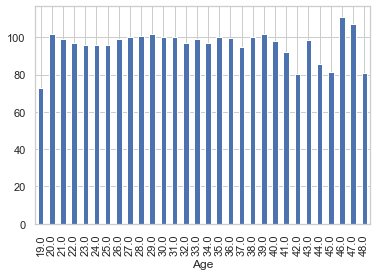

In [579]:
df.groupby('Age').median()['on_base_plus_slugging_percentage_plus'].plot(kind='bar')

In [580]:
df.loc[df.Age>=46,['name','season','Age','on_base_plus_slugging_percentage_plus']]

,name,season,Age,on_base_plus_slugging_percentage_plus
5278,Julio Franco,2004.0,46.0,111.0
5279,Julio Franco,2005.0,47.0,107.0
5280,Julio Franco,2006.0,48.0,81.0


In [581]:
df['Height']=df['height'].apply(lambda x:float(x.split('-')[0])+(float(x.split('-')[1])/12))

In [79]:
df['Height'].describe()

count    9781.000000
mean        6.069028
std         0.177027
min         5.500000
25%         5.916667
50%         6.083333
75%         6.166667
max         6.666667
Name: Height, dtype: float64

In [583]:
df.reset_index(inplace=True)

In [584]:
df.index

RangeIndex(start=0, stop=9784, step=1)

In [5]:
df.loc[4628:4637,['name','season','on_base_plus_slugging_percentage_plus','Max_OPS+','Best_season','Cumulative_Games_started']]

,name,season,on_base_plus_slugging_percentage_plus,Max_OPS+,Best_season,Cumulative_Games_started
4628,Starlin Castro,2010.0,100.0,115.0,0,121.0
4629,Starlin Castro,2011.0,111.0,115.0,0,279.0
4630,Starlin Castro,2012.0,102.0,115.0,0,440.0
4631,Starlin Castro,2013.0,73.0,115.0,0,599.0
4632,Starlin Castro,2014.0,115.0,115.0,1,732.0
4633,Starlin Castro,2015.0,84.0,115.0,0,836.0
4634,Starlin Castro,2016.0,93.0,115.0,0,979.0
4635,Starlin Castro,2017.0,106.0,115.0,0,1087.0
4636,Starlin Castro,2018.0,102.0,115.0,0,1236.0
4637,Starlin Castro,2019.0,93.0,115.0,0,1351.0


In [109]:
x=df.loc[(df.name=='Starlin Castro') & (df['Best_season']==0),['name','season','Best_season']]

In [117]:
x

,name,season,Best_season
4628,Starlin Castro,2010,0
4629,Starlin Castro,2011,0
4630,Starlin Castro,2012,0
4631,Starlin Castro,2013,0
4633,Starlin Castro,2015,0
4634,Starlin Castro,2016,0
4635,Starlin Castro,2017,0
4636,Starlin Castro,2018,0
4637,Starlin Castro,2019,0


In [586]:
df.columns

Index(['index', 'name', 'season', 'team_abbreviation', 'assists', 'at_bats',
       'bases_on_balls', 'batting_average', 'birth_date', 'complete_games',
       'defensive_chances', 'defensive_runs_saved_above_average',
       'defensive_runs_saved_above_average_per_innings', 'double_plays_turned',
       'doubles', 'errors', 'fielding_percentage', 'games', 'games_catcher',
       'games_center_fielder', 'games_designated_hitter',
       'games_first_baseman', 'games_in_batting_order',
       'games_in_defensive_lineup', 'games_left_fielder', 'games_outfielder',
       'games_pinch_hitter', 'games_pinch_runner', 'games_pitcher',
       'games_right_fielder', 'games_second_baseman', 'games_shortstop',
       'games_started', 'games_third_baseman', 'grounded_into_double_plays',
       'height', 'hits', 'home_runs', 'innings_played',
       'intentional_bases_on_balls', 'league_fielding_percentage',
       'league_range_factor_per_game', 'league_range_factor_per_nine_innings',
       'nati

In [133]:
df['games_started'].describe()

count    9781.000000
mean       92.856047
std        41.086516
min         0.000000
25%        56.000000
50%        93.000000
75%       130.000000
max       162.000000
Name: games_started, dtype: float64

In [589]:
df['Cumulative_Games_started']=0

In [591]:
for name in log_progress(df['name'].unique(),every=1):
    df.loc[df.name==name,'Cumulative_Games_started']=df.loc[df.name==name,'games_started'].cumsum()

In [592]:
df['Cumulative_Games_started'].describe()

count    9784.000000
mean      549.764105
std       496.644137
min         0.000000
25%       156.000000
50%       394.000000
75%       808.250000
max      2875.000000
Name: Cumulative_Games_started, dtype: float64

# Dataframe after Feature Engineering

In [593]:
df.to_csv('Mlb_Rosters_2000_2020_filtered.csv')

In [594]:
df_test=pd.read_csv('Mlb_Rosters_2000_2020_filtered.csv',index_col=0)
df_test.shape

(9784, 73)

In [6]:
df.columns

Index(['index', 'name', 'season', 'team_abbreviation', 'assists', 'at_bats',
       'bases_on_balls', 'batting_average', 'birth_date', 'complete_games',
       'defensive_chances', 'defensive_runs_saved_above_average',
       'defensive_runs_saved_above_average_per_innings', 'double_plays_turned',
       'doubles', 'errors', 'fielding_percentage', 'games', 'games_catcher',
       'games_center_fielder', 'games_designated_hitter',
       'games_first_baseman', 'games_in_batting_order',
       'games_in_defensive_lineup', 'games_left_fielder', 'games_outfielder',
       'games_pinch_hitter', 'games_pinch_runner', 'games_pitcher',
       'games_right_fielder', 'games_second_baseman', 'games_shortstop',
       'games_started', 'games_third_baseman', 'grounded_into_double_plays',
       'height', 'hits', 'home_runs', 'innings_played',
       'intentional_bases_on_balls', 'league_fielding_percentage',
       'league_range_factor_per_game', 'league_range_factor_per_nine_innings',
       'nati

In [16]:
not_useful=[] #removing players who have less than 3 years mlb experience 
for name in df['name'].unique():
    if len(df.loc[df.name==name,:])>=3:
        pass
    else:
        not_useful.append(name)

In [17]:
len(not_useful)

186

In [18]:
not_useful

['Robby Hammock',
 'Luis Terrero',
 'Koyie Hill',
 'Bobby Estalella',
 'Augie Ojeda',
 'Josh Wilson',
 'Tony Abreu',
 'Collin Cowgill',
 'Cody Ransom',
 'Xavier Paul',
 'Bobby Wilson',
 'Chris Herrmann',
 'Christian Walker',
 'John Ryan Murphy',
 'Blake Swihart',
 'Nick Green',
 'Damon Hollins',
 'Pete Orr',
 'Brent Lillibridge',
 'Reid Brignac',
 'Preston Tucker',
 'Carlos Pérez',
 'Austin Riley',
 'Mike Kinkade',
 'Gerónimo Gil',
 'Ryan McGuire',
 'David Newhan',
 'Raúl Chávez',
 'Alberto Castillo',
 'Jake Fox',
 'David Lough',
 'Steve Lombardozzi',
 'Jemile Weeks',
 'Junior Lake',
 'Hyun Soo Kim',
 'Julio Borbón',
 'Anthony Santander',
 'Chance Sisco',
 'Curtis Pride',
 'Sandy Martínez',
 'Shawn Wooten',
 'George Kottaras',
 'Ryan Shealy',
 'Angel Sánchez',
 'Iván De Jesús',
 'Alex Verdugo',
 'Kevin Plawecki',
 'Yairo Muñoz',
 'José Nieves',
 'Bobby Hill',
 'Calvin Murray',
 'Matt Murton',
 'Matt Szczur',
 'Munenori Kawasaki',
 'Ian Happ',
 'David Bote',
 'Tony Kemp',
 'Hernán Pérez

In [19]:
bad_indices=[]
for name in not_useful:
    bad_indices.append(df.loc[df.name==name,:].index)

In [20]:
removals=[]
for bad_index in bad_indices:
    removals.append(bad_index[0])

In [21]:
removals #indexes of 'not useful' players

[314,
 326,
 387,
 390,
 572,
 646,
 670,
 749,
 788,
 930,
 939,
 1000,
 1061,
 1064,
 1128,
 1515,
 1523,
 1550,
 1693,
 2045,
 2113,
 2148,
 2162,
 2406,
 2452,
 2509,
 2558,
 2639,
 2670,
 2755,
 2903,
 2944,
 2949,
 2966,
 2968,
 2984,
 3009,
 3011,
 3216,
 3504,
 3567,
 3712,
 3808,
 3810,
 3899,
 4060,
 4068,
 4070,
 4135,
 4273,
 4424,
 4438,
 4732,
 4796,
 4801,
 4809,
 4829,
 4864,
 4964,
 4975,
 5045,
 5065,
 5074,
 5131,
 5149,
 5229,
 5309,
 5314,
 5328,
 5370,
 5496,
 5498,
 5588,
 5617,
 5705,
 5708,
 5746,
 5841,
 5843,
 5893,
 5914,
 5916,
 5930,
 6021,
 6101,
 6104,
 6110,
 6205,
 6229,
 6281,
 6304,
 6459,
 6461,
 6538,
 6563,
 6634,
 6645,
 6700,
 6744,
 6749,
 6751,
 6754,
 6774,
 6799,
 6886,
 7046,
 7073,
 7154,
 7186,
 7209,
 7243,
 7257,
 7259,
 7262,
 7264,
 7294,
 7385,
 7396,
 7403,
 7574,
 7673,
 7675,
 7677,
 7701,
 7709,
 7846,
 7884,
 7918,
 7920,
 7922,
 7924,
 7971,
 8084,
 8122,
 8164,
 8172,
 8176,
 8225,
 8287,
 8329,
 8334,
 8336,
 8338,
 8466,
 85

In [22]:
df.drop(index=removals,inplace=True)

In [23]:
df.shape #dataframe after removal

(9113, 75)

In [24]:
df.head()

,index,name,season,team_abbreviation,assists,at_bats,bases_on_balls,batting_average,birth_date,complete_games,defensive_chances,defensive_runs_saved_above_average,defensive_runs_saved_above_average_per_innings,double_plays_turned,doubles,errors,fielding_percentage,games,games_catcher,games_center_fielder,games_designated_hitter,games_first_baseman,games_in_batting_order,games_in_defensive_lineup,games_left_fielder,games_outfielder,games_pinch_hitter,games_pinch_runner,games_pitcher,games_right_fielder,games_second_baseman,games_shortstop,games_started,games_third_baseman,grounded_into_double_plays,height,hits,home_runs,innings_played,intentional_bases_on_balls,league_fielding_percentage,league_range_factor_per_game,league_range_factor_per_nine_innings,nationality,on_base_percentage,on_base_plus_slugging_percentage,on_base_plus_slugging_percentage_plus,plate_appearances,player_id,position,putouts,range_factor_per_game,range_factor_per_nine_innings,runs,runs_batted_in,sacrifice_flies,sacrifice_hits,slugging_percentage,stolen_bases,times_caught_stealing,times_hit_by_pitch,times_struck_out,total_bases,total_fielding_runs_above_average,total_fielding_runs_above_average_per_innings,triples,weight,birth_year,Age,Max_OPS+,Best_season,Height,Cumulative_Games_started,Cluster,Relative_performance_to_cluster_avg
0,1,Damian Miller,1998.0,MIL,26.0,168.0,11.0,0.286,1969-10-13,41.0,285.0,NaN,NaN,2.0,14.0,4.0,0.986,57.0,46.0,0.0,2.0,1.0,57.0,48.0,0.0,2.0,10.0,2.0,0.0,2.0,0.0,0.0,43.0,0.0,2.0,6-3,48.0,3.0,388.1,2.0,0.990,7.47,7.51,United States of America,0.337,0.783,104.0,183.0,milleda02,C,255.0,6.11,6.51,17.0,14.0,0.0,2.0,0.446,1.0,0.0,2.0,43.0,75.0,-2.0,-6.0,2.0,202,1969,29.0,104.0,1,6.25,43.0,0,1.106383
1,2,Damian Miller,1999.0,MIL,61.0,296.0,19.0,0.270,1969-10-13,71.0,689.0,NaN,NaN,9.0,19.0,6.0,0.991,86.0,86.0,0.0,0.0,0.0,86.0,86.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,6.0,6-3,80.0,11.0,715.1,3.0,0.990,7.35,7.41,United States of America,0.316,0.762,90.0,320.0,milleda02,C,622.0,7.94,8.59,35.0,47.0,3.0,0.0,0.446,0.0,0.0,2.0,78.0,132.0,3.0,5.0,0.0,202,1969,30.0,104.0,0,6.25,121.0,0,0.957447
2,3,Damian Miller,2000.0,MIL,47.0,324.0,36.0,0.275,1969-10-13,84.0,734.0,NaN,NaN,4.0,24.0,6.0,0.992,100.0,97.0,0.0,0.0,2.0,100.0,99.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,6.0,6-3,89.0,10.0,805.2,4.0,0.990,7.38,7.45,United States of America,0.347,0.788,95.0,364.0,milleda02,C,681.0,7.51,8.13,43.0,44.0,2.0,1.0,0.441,2.0,2.0,1.0,74.0,143.0,9.0,13.0,0.0,202,1969,31.0,104.0,0,6.25,212.0,0,1.010638
3,4,Damian Miller,2001.0,MIL,81.0,380.0,35.0,0.271,1969-10-13,83.0,1054.0,NaN,NaN,6.0,19.0,7.0,0.993,123.0,121.0,0.0,0.0,0.0,123.0,121.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,9.0,6-3,103.0,13.0,978.0,9.0,0.992,7.65,7.74,United States of America,0.337,0.761,89.0,425.0,milleda02,C,966.0,8.65,9.63,45.0,47.0,2.0,4.0,0.424,0.0,1.0,4.0,80.0,161.0,3.0,4.0,0.0,202,1969,32.0,104.0,0,6.25,323.0,0,0.946809
4,5,Damian Miller,2002.0,MIL,49.0,297.0,38.0,0.249,1969-10-13,65.0,767.0,NaN,NaN,8.0,22.0,2.0,0.997,101.0,100.0,0.0,0.0,0.0,101.0,100.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,14.0,6-3,74.0,11.0,763.0,5.0,0.991,7.47,7.53,United States of America,0.340,0.775,94.0,340.0,milleda02,C,716.0,7.65,9.02,40.0,42.0,0.0,2.0,0.434,0.0,0.0,3.0,88.0,129.0,1.0,2.0,0.0,202,1969,33.0,104.0,0,6.25,413.0,0,1.000000


In [25]:
df.to_csv('Mlb_Rosters_2000_2020_filtered.csv') #saving df for future

In [26]:
df=pd.read_csv('Mlb_Rosters_2000_2020_filtered.csv')

In [27]:
df.loc[(df.name=='Damian Miller'),['name','season','on_base_plus_slugging_percentage_plus','Cumulative_Games_started']][:3]

,name,season,on_base_plus_slugging_percentage_plus,Cumulative_Games_started
0,Damian Miller,1998.0,104.0,43.0
1,Damian Miller,1999.0,90.0,121.0
2,Damian Miller,2000.0,95.0,212.0


In [28]:
first_three_seasons=[]

In [29]:
for name in df.name.unique():
    df_name=df.loc[df.name==name,['name','season','on_base_plus_slugging_percentage_plus','Cumulative_Games_started']][:3]
    first_three_seasons.append(df_name)

In [30]:
df_first_three_seasons=pd.concat(first_three_seasons)

In [31]:
df_first_three_seasons.shape #first three seasons of each player

(3402, 4)

In [32]:
df_first_three_seasons.head(20)

,name,season,on_base_plus_slugging_percentage_plus,Cumulative_Games_started
0,Damian Miller,1998.0,104.0,43.0
1,Damian Miller,1999.0,90.0,121.0
2,Damian Miller,2000.0,95.0,212.0
10,Greg Colbrunn,1992.0,83.0,44.0
11,Greg Colbrunn,1993.0,76.0,77.0
12,Greg Colbrunn,1994.0,112.0,115.0
19,Jay Bell,1988.0,59.0,68.0
20,Jay Bell,1989.0,92.0,138.0
21,Jay Bell,1990.0,94.0,291.0
33,Tony Womack,1997.0,81.0,148.0


In [516]:
df_test=df_first_three_seasons.groupby('name')['on_base_plus_slugging_percentage_plus','Cumulative_Games_started'].mean()

<ipython-input-516-c2fbcd5f4c9a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_test=df_first_three_seasons.groupby('name')['on_base_plus_slugging_percentage_plus','Cumulative_Games_started'].mean()


In [517]:
df_test

,on_base_plus_slugging_percentage_plus,Cumulative_Games_started
name,,
A.J. Ellis,93.000000,230.333333
A.J. Pierzynski,105.666667,224.333333
AJ Hinch,70.333333,173.666667
AJ Pollock,121.333333,193.666667
Aaron Altherr,83.333333,134.333333
Aaron Boone,98.333333,161.666667
Aaron Hicks,79.000000,149.000000
Aaron Hill,96.666667,155.333333
Aaron Judge,154.333333,230.333333


# Clustering

In [518]:
from sklearn.cluster import KMeans

In [519]:
k_means_2 = KMeans(n_clusters=2).fit(df_test)
k_means_3 = KMeans(n_clusters=3).fit(df_test)
k_means_4 = KMeans(n_clusters=4).fit(df_test)
k_means_5 = KMeans(n_clusters=5).fit(df_test)
k_means_6 = KMeans(n_clusters=6).fit(df_test)
k_means_7 = KMeans(n_clusters=7).fit(df_test)
k_list = [k_means_2,k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

In [520]:
from sklearn.metrics import calinski_harabasz_score
scores = []
for k in k_list:
    labels = k.labels_
    scores.append(calinski_harabasz_score(df_test, labels))

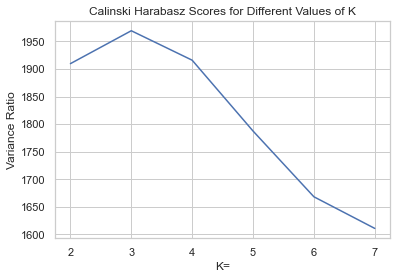

In [521]:
plt.plot([2,3, 4, 5, 6, 7], scores)
plt.xticks([2,3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

In [522]:
wcss_score = []
for model in k_list:
    labels = model.labels_
    wcss_score.append(model.inertia_)

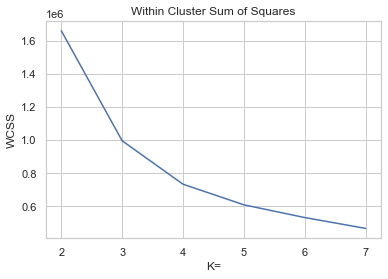

In [523]:
plt.plot([2,3, 4, 5, 6, 7], wcss_score)
plt.xticks([2,3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

In [524]:
K_means=k_means_4

In [525]:
K_means.labels_

array([2, 3, 3, ..., 3, 2, 1], dtype=int32)

In [526]:
predicted_clusters = K_means.predict(df_test)

Text(0.5, 1.0, 'Player Clusters based on OPS and Games')

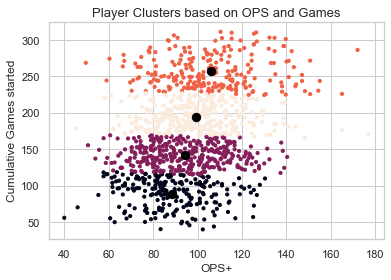

In [533]:
plt.scatter(df_test.iloc[:, 0], df_test.iloc[:, 1], c=predicted_clusters, s=10)
centers = K_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70);
plt.xlabel('OPS+',fontsize=12)
plt.ylabel('Cumulative Games started',fontsize=12)
plt.title('Player Clusters based on OPS and Games',fontsize=13)

In [45]:
K_means.labels_

array([2, 1, 1, ..., 1, 2, 3], dtype=int32)

In [46]:
df_test['cluster']=K_means.labels_

In [47]:
df_test.loc[:,:]

,on_base_plus_slugging_percentage_plus,Cumulative_Games_started,cluster
name,,,
A.J. Ellis,93.000000,230.333333,2
A.J. Pierzynski,105.666667,224.333333,1
AJ Hinch,70.333333,173.666667,1
AJ Pollock,121.333333,193.666667,1
Aaron Altherr,83.333333,134.333333,3
Aaron Boone,98.333333,161.666667,3
Aaron Hicks,79.000000,149.000000,3
Aaron Hill,96.666667,155.333333,3
Aaron Judge,154.333333,230.333333,2


In [48]:
names=[]
for name in df_test.index:
    names.append(name)

In [49]:
clusters=[]
for cluster in df_test['cluster'].values:
    clusters.append(cluster)

In [50]:
tuples=[]
for i in range(len(names)):
    tuples.append((names[i],clusters[i]))
len(tuples)

1134

In [51]:
clusters_dict=dict(tuples)

In [52]:
clusters_dict

{'A.J. Ellis': 2,
 'A.J. Pierzynski': 1,
 'AJ Hinch': 1,
 'AJ Pollock': 1,
 'Aaron Altherr': 3,
 'Aaron Boone': 3,
 'Aaron Hicks': 3,
 'Aaron Hill': 3,
 'Aaron Judge': 2,
 'Aaron Miles': 1,
 'Aaron Rowand': 3,
 'Abraham Almonte': 0,
 'Abraham Núñez': 0,
 'Adalberto Mondesi': 3,
 'Adam Dunn': 1,
 'Adam Duvall': 2,
 'Adam Eaton': 1,
 'Adam Engel': 1,
 'Adam Everett': 2,
 'Adam Frazier': 3,
 'Adam Jones': 2,
 'Adam Kennedy': 2,
 'Adam LaRoche': 1,
 'Adam Lind': 3,
 'Adam Rosales': 0,
 'Addison Russell': 1,
 'Adeiny Hechavarría': 2,
 'Adonis García': 3,
 'Adrian Brown': 0,
 'Adrián Beltré': 1,
 'Adrián González': 1,
 'Akinori Iwamura': 2,
 'Al Martin': 1,
 'Albert Almora': 3,
 'Albert Belle': 3,
 'Albert Pujols': 1,
 'Alberto Callaspo': 1,
 'Alberto González': 0,
 'Alcides Escobar': 2,
 'Aledmys Díaz': 1,
 'Alejandro De Aza': 1,
 'Alex Arias': 0,
 'Alex Avila': 1,
 'Alex Bregman': 1,
 'Alex Dickerson': 0,
 'Alex Gonzalez': 2,
 'Alex Gordon': 2,
 'Alex Ochoa': 3,
 'Alex Presley': 3,
 'Alexe

In [633]:
df.columns

Index(['index', 'name', 'season', 'team_abbreviation', 'assists', 'at_bats',
       'bases_on_balls', 'batting_average', 'birth_date', 'complete_games',
       'defensive_chances', 'defensive_runs_saved_above_average',
       'defensive_runs_saved_above_average_per_innings', 'double_plays_turned',
       'doubles', 'errors', 'fielding_percentage', 'games', 'games_catcher',
       'games_center_fielder', 'games_designated_hitter',
       'games_first_baseman', 'games_in_batting_order',
       'games_in_defensive_lineup', 'games_left_fielder', 'games_outfielder',
       'games_pinch_hitter', 'games_pinch_runner', 'games_pitcher',
       'games_right_fielder', 'games_second_baseman', 'games_shortstop',
       'games_started', 'games_third_baseman', 'grounded_into_double_plays',
       'height', 'hits', 'home_runs', 'innings_played',
       'intentional_bases_on_balls', 'league_fielding_percentage',
       'league_range_factor_per_game', 'league_range_factor_per_nine_innings',
       'nati

In [55]:
df['Cluster']=df['name'].map(clusters_dict)

In [56]:
df.loc[30:45,['name','season','on_base_plus_slugging_percentage_plus','Cluster']]

,name,season,on_base_plus_slugging_percentage_plus,Cluster
30,Jay Bell,1999.0,131.0,3
31,Jay Bell,2000.0,94.0,3
32,Jay Bell,2001.0,88.0,3
33,Tony Womack,1997.0,81.0,2
34,Tony Womack,1998.0,77.0,2
35,Tony Womack,1999.0,77.0,2
36,Tony Womack,2000.0,71.0,2
37,Tony Womack,2001.0,64.0,2
38,Tony Womack,2002.0,71.0,2
39,Tony Womack,2003.0,40.0,2


In [57]:
df_season=df.set_index('season')

In [58]:
t=df_season.groupby(['Cluster','season'])['on_base_plus_slugging_percentage_plus'].median()

In [59]:
tt=t.unstack(level=0)

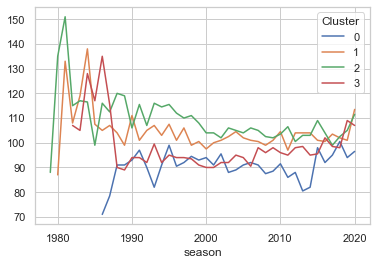

In [60]:
tt.plot()

In [61]:
avgs=df.groupby('Cluster')['on_base_plus_slugging_percentage_plus'].median()

In [62]:
df['Relative_performance_to_cluster_avg']=0
df.loc[df.Cluster==0,'Relative_performance_to_cluster_avg']=df.loc[df.Cluster==0,'on_base_plus_slugging_percentage_plus']/avgs[0]

In [63]:
df.loc[df.Cluster==0,'Relative_performance_to_cluster_avg'].describe()

count    1366.000000
mean        1.009131
std         0.274665
min         0.065934
25%         0.824176
50%         1.000000
75%         1.186813
max         2.186813
Name: Relative_performance_to_cluster_avg, dtype: float64

In [64]:
df.loc[df.Cluster==1,'Relative_performance_to_cluster_avg']=df.loc[df.Cluster==1,'on_base_plus_slugging_percentage_plus']/avgs[1]
df.loc[df.Cluster==1,'Relative_performance_to_cluster_avg'].describe()

count    2924.000000
mean        1.015755
std         0.250279
min         0.196078
25%         0.852941
50%         1.000000
75%         1.166667
max         2.078431
Name: Relative_performance_to_cluster_avg, dtype: float64

In [65]:
df.loc[df.Cluster==2,'Relative_performance_to_cluster_avg']=df.loc[df.Cluster==2,'on_base_plus_slugging_percentage_plus']/avgs[2]
df.loc[df.Cluster==2,'Relative_performance_to_cluster_avg'].describe()

count    2347.000000
mean        1.019491
std         0.263621
min         0.245283
25%         0.839623
50%         1.000000
75%         1.179245
max         2.528302
Name: Relative_performance_to_cluster_avg, dtype: float64

In [66]:
df.loc[df.Cluster==3,'Relative_performance_to_cluster_avg']=df.loc[df.Cluster==3,'on_base_plus_slugging_percentage_plus']/avgs[3]
df.loc[df.Cluster==3,'Relative_performance_to_cluster_avg'].describe()

count    2476.000000
mean        1.021758
std         0.273384
min         0.242105
25%         0.842105
50%         1.000000
75%         1.200000
max         2.136842
Name: Relative_performance_to_cluster_avg, dtype: float64

# Modeling Preparation

In [67]:
df.to_csv('Mlb_Rosters_2000_2020_filtered.csv')

In [68]:
df=pd.read_csv('Mlb_Rosters_2000_2020_filtered.csv',index_col=0)
df.shape

(9113, 76)

In [69]:
df.columns

Index(['Unnamed: 0.1', 'index', 'name', 'season', 'team_abbreviation',
       'assists', 'at_bats', 'bases_on_balls', 'batting_average', 'birth_date',
       'complete_games', 'defensive_chances',
       'defensive_runs_saved_above_average',
       'defensive_runs_saved_above_average_per_innings', 'double_plays_turned',
       'doubles', 'errors', 'fielding_percentage', 'games', 'games_catcher',
       'games_center_fielder', 'games_designated_hitter',
       'games_first_baseman', 'games_in_batting_order',
       'games_in_defensive_lineup', 'games_left_fielder', 'games_outfielder',
       'games_pinch_hitter', 'games_pinch_runner', 'games_pitcher',
       'games_right_fielder', 'games_second_baseman', 'games_shortstop',
       'games_started', 'games_third_baseman', 'grounded_into_double_plays',
       'height', 'hits', 'home_runs', 'innings_played',
       'intentional_bases_on_balls', 'league_fielding_percentage',
       'league_range_factor_per_game', 'league_range_factor_per_nine

In [70]:
df_first_three_seasons.shape

(3402, 4)

In [71]:
six_year_players=[]
for name in df['name'].unique():
    if len(df.loc[df.name==name,:])>=6:
           six_year_players.append(name)
    else:
           pass

In [72]:
six_year_dfs=[]
for player in six_year_players:
    df_player=df.loc[df.name==player,:]
    six_year_dfs.append(df_player)
Six_year_players=pd.concat(six_year_dfs)

In [73]:
Six_year_players.head()

,Unnamed: 0.1,index,name,season,team_abbreviation,assists,at_bats,bases_on_balls,batting_average,birth_date,complete_games,defensive_chances,defensive_runs_saved_above_average,defensive_runs_saved_above_average_per_innings,double_plays_turned,doubles,errors,fielding_percentage,games,games_catcher,games_center_fielder,games_designated_hitter,games_first_baseman,games_in_batting_order,games_in_defensive_lineup,games_left_fielder,games_outfielder,games_pinch_hitter,games_pinch_runner,games_pitcher,games_right_fielder,games_second_baseman,games_shortstop,games_started,games_third_baseman,grounded_into_double_plays,height,hits,home_runs,innings_played,intentional_bases_on_balls,league_fielding_percentage,league_range_factor_per_game,league_range_factor_per_nine_innings,nationality,on_base_percentage,on_base_plus_slugging_percentage,on_base_plus_slugging_percentage_plus,plate_appearances,player_id,position,putouts,range_factor_per_game,range_factor_per_nine_innings,runs,runs_batted_in,sacrifice_flies,sacrifice_hits,slugging_percentage,stolen_bases,times_caught_stealing,times_hit_by_pitch,times_struck_out,total_bases,total_fielding_runs_above_average,total_fielding_runs_above_average_per_innings,triples,weight,birth_year,Age,Max_OPS+,Best_season,Height,Cumulative_Games_started,Cluster,Relative_performance_to_cluster_avg
0,0,1,Damian Miller,1998.0,MIL,26.0,168.0,11.0,0.286,1969-10-13,41.0,285.0,NaN,NaN,2.0,14.0,4.0,0.986,57.0,46.0,0.0,2.0,1.0,57.0,48.0,0.0,2.0,10.0,2.0,0.0,2.0,0.0,0.0,43.0,0.0,2.0,6-3,48.0,3.0,388.1,2.0,0.990,7.47,7.51,United States of America,0.337,0.783,104.0,183.0,milleda02,C,255.0,6.11,6.51,17.0,14.0,0.0,2.0,0.446,1.0,0.0,2.0,43.0,75.0,-2.0,-6.0,2.0,202,1969,29.0,104.0,1,6.25,43.0,3,1.094737
1,1,2,Damian Miller,1999.0,MIL,61.0,296.0,19.0,0.270,1969-10-13,71.0,689.0,NaN,NaN,9.0,19.0,6.0,0.991,86.0,86.0,0.0,0.0,0.0,86.0,86.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,6.0,6-3,80.0,11.0,715.1,3.0,0.990,7.35,7.41,United States of America,0.316,0.762,90.0,320.0,milleda02,C,622.0,7.94,8.59,35.0,47.0,3.0,0.0,0.446,0.0,0.0,2.0,78.0,132.0,3.0,5.0,0.0,202,1969,30.0,104.0,0,6.25,121.0,3,0.947368
2,2,3,Damian Miller,2000.0,MIL,47.0,324.0,36.0,0.275,1969-10-13,84.0,734.0,NaN,NaN,4.0,24.0,6.0,0.992,100.0,97.0,0.0,0.0,2.0,100.0,99.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,6.0,6-3,89.0,10.0,805.2,4.0,0.990,7.38,7.45,United States of America,0.347,0.788,95.0,364.0,milleda02,C,681.0,7.51,8.13,43.0,44.0,2.0,1.0,0.441,2.0,2.0,1.0,74.0,143.0,9.0,13.0,0.0,202,1969,31.0,104.0,0,6.25,212.0,3,1.000000
3,3,4,Damian Miller,2001.0,MIL,81.0,380.0,35.0,0.271,1969-10-13,83.0,1054.0,NaN,NaN,6.0,19.0,7.0,0.993,123.0,121.0,0.0,0.0,0.0,123.0,121.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,9.0,6-3,103.0,13.0,978.0,9.0,0.992,7.65,7.74,United States of America,0.337,0.761,89.0,425.0,milleda02,C,966.0,8.65,9.63,45.0,47.0,2.0,4.0,0.424,0.0,1.0,4.0,80.0,161.0,3.0,4.0,0.0,202,1969,32.0,104.0,0,6.25,323.0,3,0.936842
4,4,5,Damian Miller,2002.0,MIL,49.0,297.0,38.0,0.249,1969-10-13,65.0,767.0,NaN,NaN,8.0,22.0,2.0,0.997,101.0,100.0,0.0,0.0,0.0,101.0,100.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,14.0,6-3,74.0,11.0,763.0,5.0,0.991,7.47,7.53,United States of America,0.340,0.775,94.0,340.0,milleda02,C,716.0,7.65,9.02,40.0,42.0,0.0,2.0,0.434,0.0,0.0,3.0,88.0,129.0,1.0,2.0,0.0,202,1969,33.0,104.0,0,6.25,413.0,3,0.989474


In [74]:
Six_year_players.shape

(7581, 76)

In [75]:
five_year_players=[]
four_year_players=[]
for name in df['name'].unique():
    if len(df.loc[df.name==name,:])==5:
        five_year_players.append(name)
    elif len(df.loc[df.name==name,:])==4:
        four_year_players.append(name)
    else:
        pass
print(len(five_year_players),len(four_year_players))

122 103


In [76]:
five_years_dfs=[]
for player in five_year_players:
    df_player=df.loc[df.name==player,:]
    five_years_dfs.append(df_player)
Five_years_dfs=pd.concat(five_years_dfs)

In [77]:
Five_years_dfs.shape

(610, 76)

In [78]:
four_year_dfs=[]
for player in four_year_players:
    df_player=df.loc[df.name==player,:]
    four_year_dfs.append(df_player)
Four_years_dfs=pd.concat(four_year_dfs)
Four_years_dfs.shape

(412, 76)

In [79]:
Four_years_dfs.columns

Index(['Unnamed: 0.1', 'index', 'name', 'season', 'team_abbreviation',
       'assists', 'at_bats', 'bases_on_balls', 'batting_average', 'birth_date',
       'complete_games', 'defensive_chances',
       'defensive_runs_saved_above_average',
       'defensive_runs_saved_above_average_per_innings', 'double_plays_turned',
       'doubles', 'errors', 'fielding_percentage', 'games', 'games_catcher',
       'games_center_fielder', 'games_designated_hitter',
       'games_first_baseman', 'games_in_batting_order',
       'games_in_defensive_lineup', 'games_left_fielder', 'games_outfielder',
       'games_pinch_hitter', 'games_pinch_runner', 'games_pitcher',
       'games_right_fielder', 'games_second_baseman', 'games_shortstop',
       'games_started', 'games_third_baseman', 'grounded_into_double_plays',
       'height', 'hits', 'home_runs', 'innings_played',
       'intentional_bases_on_balls', 'league_fielding_percentage',
       'league_range_factor_per_game', 'league_range_factor_per_nine

In [80]:
next_season=[]
next_next_season=[]
next_next_next_season=[]
for name in Six_year_players.name.unique():
    df_next=Six_year_players.loc[Six_year_players.name==name,:][3:4]
    df_next_next=Six_year_players.loc[Six_year_players.name==name,:][4:5]
    df_next_next_next=Six_year_players.loc[Six_year_players.name==name,:][5:6]
    next_season.append(df_next)
    next_next_season.append(df_next_next)
    next_next_next_season.append(df_next_next_next)
Next_Season=pd.concat(next_season)
Next_Next_Season=pd.concat(next_next_season)
Next_Next_Next_Season=pd.concat(next_next_next_season)

In [81]:
Next_Season.on_base_plus_slugging_percentage_plus.head()

3      89.0
13     99.0
22    113.0
36     71.0
45    123.0
Name: on_base_plus_slugging_percentage_plus, dtype: float64

In [82]:
next_year_dict={}
for player in Next_Season.name:
    OPS_plus=Next_Season.loc[Next_Season.name==player,'on_base_plus_slugging_percentage_plus']
    next_year_dict[player]=OPS_plus.values

In [83]:
Six_year_players['Next_Year_OPS+']=Six_year_players['name'].map(next_year_dict).astype('float64')

In [84]:
next_next_year_dict={}
for player in Next_Next_Season.name:
    OPS_plus=Next_Next_Season.loc[Next_Next_Season.name==player,'on_base_plus_slugging_percentage_plus']
    next_next_year_dict[player]=OPS_plus.values

In [85]:
Next_Next_Season.on_base_plus_slugging_percentage_plus.head()

4      94.0
14    105.0
23    101.0
37     64.0
46    129.0
Name: on_base_plus_slugging_percentage_plus, dtype: float64

In [86]:
Six_year_players['Two_Year_OPS+']=Six_year_players['name'].map(next_next_year_dict).astype('float64')

In [87]:
next_next_next_year_dict={}
for player in Next_Next_Next_Season.name:
    OPS_plus=Next_Next_Next_Season.loc[Next_Next_Next_Season.name==player,'on_base_plus_slugging_percentage_plus']
    next_next_next_year_dict[player]=OPS_plus.values

In [88]:
Six_year_players['Three_Year_OPS+']=Six_year_players['name'].map(next_next_next_year_dict).astype('float64')

In [89]:
Next_Next_Next_Season.on_base_plus_slugging_percentage_plus.head()

5      76.0
15     88.0
24    124.0
38     71.0
47     93.0
Name: on_base_plus_slugging_percentage_plus, dtype: float64

In [90]:
df.to_csv('Mlb_Rosters_2000_2020_filtered.csv')

In [293]:
df=pd.read_csv('Mlb_Rosters_2000_2020_filtered.csv',index_col=0)
df.shape

(9113, 76)

In [294]:
df['Elite_Slugging']=np.where(df.slugging_percentage>.46,1,0)
Six_year_players['Elite_Slugging']=np.where(Six_year_players.slugging_percentage>.46,1,0)

In [295]:
Six_year_players.head(10)

,Unnamed: 0.1,index,name,season,team_abbreviation,assists,at_bats,bases_on_balls,batting_average,birth_date,complete_games,defensive_chances,defensive_runs_saved_above_average,defensive_runs_saved_above_average_per_innings,double_plays_turned,doubles,errors,fielding_percentage,games,games_catcher,games_center_fielder,games_designated_hitter,games_first_baseman,games_in_batting_order,games_in_defensive_lineup,games_left_fielder,games_outfielder,games_pinch_hitter,games_pinch_runner,games_pitcher,games_right_fielder,games_second_baseman,games_shortstop,games_started,games_third_baseman,grounded_into_double_plays,height,hits,home_runs,innings_played,intentional_bases_on_balls,league_fielding_percentage,league_range_factor_per_game,league_range_factor_per_nine_innings,nationality,on_base_percentage,on_base_plus_slugging_percentage,on_base_plus_slugging_percentage_plus,plate_appearances,player_id,position,putouts,range_factor_per_game,range_factor_per_nine_innings,runs,runs_batted_in,sacrifice_flies,sacrifice_hits,slugging_percentage,stolen_bases,times_caught_stealing,times_hit_by_pitch,times_struck_out,total_bases,total_fielding_runs_above_average,total_fielding_runs_above_average_per_innings,triples,weight,birth_year,Age,Max_OPS+,Best_season,Height,Cumulative_Games_started,Cluster,Relative_performance_to_cluster_avg,Next_Year_OPS+,Two_Year_OPS+,Three_Year_OPS+,Elite_Slugging
0,0,1,Damian Miller,1998.0,MIL,26.0,168.0,11.0,0.286,1969-10-13,41.0,285.0,NaN,NaN,2.0,14.0,4.0,0.986,57.0,46.0,0.0,2.0,1.0,57.0,48.0,0.0,2.0,10.0,2.0,0.0,2.0,0.0,0.0,43.0,0.0,2.0,6-3,48.0,3.0,388.1,2.0,0.990,7.47,7.51,United States of America,0.337,0.783,104.0,183.0,milleda02,C,255.0,6.11,6.51,17.0,14.0,0.0,2.0,0.446,1.0,0.0,2.0,43.0,75.0,-2.0,-6.0,2.0,202,1969,29.0,104.0,1,6.25,43.0,3,1.094737,89.0,94.0,76.0,0
1,1,2,Damian Miller,1999.0,MIL,61.0,296.0,19.0,0.270,1969-10-13,71.0,689.0,NaN,NaN,9.0,19.0,6.0,0.991,86.0,86.0,0.0,0.0,0.0,86.0,86.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,6.0,6-3,80.0,11.0,715.1,3.0,0.990,7.35,7.41,United States of America,0.316,0.762,90.0,320.0,milleda02,C,622.0,7.94,8.59,35.0,47.0,3.0,0.0,0.446,0.0,0.0,2.0,78.0,132.0,3.0,5.0,0.0,202,1969,30.0,104.0,0,6.25,121.0,3,0.947368,89.0,94.0,76.0,0
2,2,3,Damian Miller,2000.0,MIL,47.0,324.0,36.0,0.275,1969-10-13,84.0,734.0,NaN,NaN,4.0,24.0,6.0,0.992,100.0,97.0,0.0,0.0,2.0,100.0,99.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,6.0,6-3,89.0,10.0,805.2,4.0,0.990,7.38,7.45,United States of America,0.347,0.788,95.0,364.0,milleda02,C,681.0,7.51,8.13,43.0,44.0,2.0,1.0,0.441,2.0,2.0,1.0,74.0,143.0,9.0,13.0,0.0,202,1969,31.0,104.0,0,6.25,212.0,3,1.000000,89.0,94.0,76.0,0
3,3,4,Damian Miller,2001.0,MIL,81.0,380.0,35.0,0.271,1969-10-13,83.0,1054.0,NaN,NaN,6.0,19.0,7.0,0.993,123.0,121.0,0.0,0.0,0.0,123.0,121.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,9.0,6-3,103.0,13.0,978.0,9.0,0.992,7.65,7.74,United States of America,0.337,0.761,89.0,425.0,milleda02,C,966.0,8.65,9.63,45.0,47.0,2.0,4.0,0.424,0.0,1.0,4.0,80.0,161.0,3.0,4.0,0.0,202,1969,32.0,104.0,0,6.25,323.0,3,0.936842,89.0,94.0,76.0,0
4,4,5,Damian Miller,2002.0,MIL,49.0,297.0,38.0,0.249,1969-10-13,65.0,767.0,NaN,NaN,8.0,22.0,2.0,0.997,101.0,100.0,0.0,0.0,0.0,101.0,100.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,14.0,6-3,74.0,11.0,763.0,5.0,0.991,7.47,7.53,United States of America,0.340,0.775,94.0,340.0,milleda02,C,716.0,7.65,9.02,40.0,42.0,0.0,2.0,0.434,0.0,0.0,3.0,88.0,129.0,1.0,2.0,0.0,202,1969,33.0,104.0,0,6.25,413.0,3,0.989474,89.0,94.0,76.0,0
5,5,6,Damian Miller,2003.0,MIL,73.0,352.0,39.0,0.233,1969-10-13,91.0,1016.0,0.0,0.0,6.0,19.0,3.0,0.997,114.0,114.0,0.0,0.0,0.0,114.0,114.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0,15.0,6-3,82.0,9.0,929.2,6.0,0.992,7.26,7.33,United States of America,0.310,0.680,76.0,400.0,milleda02,C,940.0,8.89,9.81,34.0,36.0,1.0,7.0,0.369,1.0,0.0,1.0,91.0,130.0,3.0,4.0,1.0,202,1969,34.0,104.0,0,6.25,516.0,3,0.800000,89.0,94.0,76.0,0
6,6,7,Damian Miller,2004.0,MIL,49.0,397.0,39.0,0.272,1969-10-13,98.0,751.0,1.0,1.0,4.0,25.0,1

In [296]:
first_three_six=[]
for player in Six_year_players.name.unique():
    df_name=Six_year_players.loc[Six_year_players.name==player,:][:3]
    first_three_six.append(df_name)
First_three_six=pd.concat(first_three_six)

In [297]:
First_three_six.head()

,Unnamed: 0.1,index,name,season,team_abbreviation,assists,at_bats,bases_on_balls,batting_average,birth_date,complete_games,defensive_chances,defensive_runs_saved_above_average,defensive_runs_saved_above_average_per_innings,double_plays_turned,doubles,errors,fielding_percentage,games,games_catcher,games_center_fielder,games_designated_hitter,games_first_baseman,games_in_batting_order,games_in_defensive_lineup,games_left_fielder,games_outfielder,games_pinch_hitter,games_pinch_runner,games_pitcher,games_right_fielder,games_second_baseman,games_shortstop,games_started,games_third_baseman,grounded_into_double_plays,height,hits,home_runs,innings_played,intentional_bases_on_balls,league_fielding_percentage,league_range_factor_per_game,league_range_factor_per_nine_innings,nationality,on_base_percentage,on_base_plus_slugging_percentage,on_base_plus_slugging_percentage_plus,plate_appearances,player_id,position,putouts,range_factor_per_game,range_factor_per_nine_innings,runs,runs_batted_in,sacrifice_flies,sacrifice_hits,slugging_percentage,stolen_bases,times_caught_stealing,times_hit_by_pitch,times_struck_out,total_bases,total_fielding_runs_above_average,total_fielding_runs_above_average_per_innings,triples,weight,birth_year,Age,Max_OPS+,Best_season,Height,Cumulative_Games_started,Cluster,Relative_performance_to_cluster_avg,Next_Year_OPS+,Two_Year_OPS+,Three_Year_OPS+,Elite_Slugging
0,0,1,Damian Miller,1998.0,MIL,26.0,168.0,11.0,0.286,1969-10-13,41.0,285.0,NaN,NaN,2.0,14.0,4.0,0.986,57.0,46.0,0.0,2.0,1.0,57.0,48.0,0.0,2.0,10.0,2.0,0.0,2.0,0.0,0.0,43.0,0.0,2.0,6-3,48.0,3.0,388.1,2.0,0.990,7.47,7.51,United States of America,0.337,0.783,104.0,183.0,milleda02,C,255.0,6.11,6.51,17.0,14.0,0.0,2.0,0.446,1.0,0.0,2.0,43.0,75.0,-2.0,-6.0,2.0,202,1969,29.0,104.0,1,6.25,43.0,3,1.094737,89.0,94.0,76.0,0
1,1,2,Damian Miller,1999.0,MIL,61.0,296.0,19.0,0.270,1969-10-13,71.0,689.0,NaN,NaN,9.0,19.0,6.0,0.991,86.0,86.0,0.0,0.0,0.0,86.0,86.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,6.0,6-3,80.0,11.0,715.1,3.0,0.990,7.35,7.41,United States of America,0.316,0.762,90.0,320.0,milleda02,C,622.0,7.94,8.59,35.0,47.0,3.0,0.0,0.446,0.0,0.0,2.0,78.0,132.0,3.0,5.0,0.0,202,1969,30.0,104.0,0,6.25,121.0,3,0.947368,89.0,94.0,76.0,0
2,2,3,Damian Miller,2000.0,MIL,47.0,324.0,36.0,0.275,1969-10-13,84.0,734.0,NaN,NaN,4.0,24.0,6.0,0.992,100.0,97.0,0.0,0.0,2.0,100.0,99.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,91.0,0.0,6.0,6-3,89.0,10.0,805.2,4.0,0.990,7.38,7.45,United States of America,0.347,0.788,95.0,364.0,milleda02,C,681.0,7.51,8.13,43.0,44.0,2.0,1.0,0.441,2.0,2.0,1.0,74.0,143.0,9.0,13.0,0.0,202,1969,31.0,104.0,0,6.25,212.0,3,1.000000,89.0,94.0,76.0,0
10,10,12,Greg Colbrunn,1992.0,ARI,29.0,168.0,6.0,0.268,1969-07-26,25.0,395.0,NaN,NaN,24.0,8.0,3.0,0.992,52.0,0.0,0.0,0.0,47.0,52.0,47.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,1.0,6-0,45.0,2.0,372.2,1.0,0.993,9.76,9.75,United States of America,0.294,0.646,83.0,180.0,colbrgr01,1B,363.0,8.34,9.47,12.0,18.0,4.0,0.0,0.351,3.0,2.0,2.0,34.0,59.0,3.0,8.0,0.0,190,1969,23.0,148.0,0,6.00,44.0,0,0.912088,99.0,105.0,88.0,0
11,11,13,Greg Colbrunn,1993.0,ARI,27.0,153.0,6.0,0.255,1969-07-26,25.0,401.0,NaN,NaN,31.0,9.0,2.0,0.995,70.0,0.0,0.0,0.0,61.0,70.0,61.0,0.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,33.0,0.0,1.0,6-0,39.0,4.0,356.1,1.0,0.992,9.61,9.68,United States of America,0.282,0.674,76.0,164.0,colbrgr01,1B,372.0,6.54,10.08,15.0,23.0,3.0,1.0,0.392,4.0,2.0,1.0,33.0,60.0,-2.0,-8.0,0.0,190,1969,24.0,148.0,0,6.00,77.0,0,0.835165,99.0,105.0,88.0,0


In [298]:
df=First_three_six.groupby('name').mean()

In [299]:
df.dtypes

Unnamed: 0.1                                      float64
index                                             float64
season                                            float64
assists                                           float64
at_bats                                           float64
bases_on_balls                                    float64
batting_average                                   float64
complete_games                                    float64
defensive_chances                                 float64
defensive_runs_saved_above_average                float64
defensive_runs_saved_above_average_per_innings    float64
double_plays_turned                               float64
doubles                                           float64
errors                                            float64
fielding_percentage                               float64
games                                             float64
games_catcher                                     float64
games_center_f

In [300]:
cols=df.columns.tolist()
cols

['Unnamed: 0.1',
 'index',
 'season',
 'assists',
 'at_bats',
 'bases_on_balls',
 'batting_average',
 'complete_games',
 'defensive_chances',
 'defensive_runs_saved_above_average',
 'defensive_runs_saved_above_average_per_innings',
 'double_plays_turned',
 'doubles',
 'errors',
 'fielding_percentage',
 'games',
 'games_catcher',
 'games_center_fielder',
 'games_designated_hitter',
 'games_first_baseman',
 'games_in_batting_order',
 'games_in_defensive_lineup',
 'games_left_fielder',
 'games_outfielder',
 'games_pinch_hitter',
 'games_pinch_runner',
 'games_pitcher',
 'games_right_fielder',
 'games_second_baseman',
 'games_shortstop',
 'games_started',
 'games_third_baseman',
 'grounded_into_double_plays',
 'hits',
 'home_runs',
 'innings_played',
 'intentional_bases_on_balls',
 'league_fielding_percentage',
 'league_range_factor_per_game',
 'league_range_factor_per_nine_innings',
 'on_base_percentage',
 'on_base_plus_slugging_percentage',
 'on_base_plus_slugging_percentage_plus',
 'pla

In [303]:
cols_sel=cols[2:7]+cols[12:13]+cols[15:16]+cols[30:31]+cols[33:35]+cols[36:37]+cols[40:44]+cols[48:52]+cols[56:57]+cols[59:]
len(cols_sel)

34

In [304]:
cols_sel

['season',
 'assists',
 'at_bats',
 'bases_on_balls',
 'batting_average',
 'doubles',
 'games',
 'games_started',
 'hits',
 'home_runs',
 'intentional_bases_on_balls',
 'on_base_percentage',
 'on_base_plus_slugging_percentage',
 'on_base_plus_slugging_percentage_plus',
 'plate_appearances',
 'runs_batted_in',
 'sacrifice_flies',
 'sacrifice_hits',
 'slugging_percentage',
 'total_bases',
 'triples',
 'weight',
 'birth_year',
 'Age',
 'Max_OPS+',
 'Best_season',
 'Height',
 'Cumulative_Games_started',
 'Cluster',
 'Relative_performance_to_cluster_avg',
 'Next_Year_OPS+',
 'Two_Year_OPS+',
 'Three_Year_OPS+',
 'Elite_Slugging']

In [305]:
df=df[cols_sel]

In [306]:
df.isna().any().sum()

1

In [307]:
df.dropna(axis=0,inplace=True)

In [308]:
df.columns

Index(['season', 'assists', 'at_bats', 'bases_on_balls', 'batting_average',
       'doubles', 'games', 'games_started', 'hits', 'home_runs',
       'intentional_bases_on_balls', 'on_base_percentage',
       'on_base_plus_slugging_percentage',
       'on_base_plus_slugging_percentage_plus', 'plate_appearances',
       'runs_batted_in', 'sacrifice_flies', 'sacrifice_hits',
       'slugging_percentage', 'total_bases', 'triples', 'weight', 'birth_year',
       'Age', 'Max_OPS+', 'Best_season', 'Height', 'Cumulative_Games_started',
       'Cluster', 'Relative_performance_to_cluster_avg', 'Next_Year_OPS+',
       'Two_Year_OPS+', 'Three_Year_OPS+', 'Elite_Slugging'],
      dtype='object')

In [309]:
df.shape

(738, 34)

In [310]:
Y=df[df.columns[-4:-1]]
Y.shape

(738, 3)

In [311]:
Y.columns

Index(['Next_Year_OPS+', 'Two_Year_OPS+', 'Three_Year_OPS+'], dtype='object')

In [313]:
col_list=df.columns.tolist()
X_col=col_list[:-4]+col_list[-1:]

In [314]:
X_unscaled=df[X_col]
scaler=StandardScaler()
scaler.fit(X_unscaled)
X=pd.DataFrame(data=scaler.transform(X_unscaled), columns=X_col)

In [315]:
X.shape

(738, 31)

# Modeling

In [316]:
lr_dummy=LinearRegression()
wrapper_dummy=RegressorChain(lr_dummy,order=[0,1,2])
cv=RepeatedKFold(n_repeats=3,random_state=1)
n_scores=cross_val_score(wrapper_dummy,X,Y,scoring='neg_mean_squared_error',cv=cv,verbose=1,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.3s finished


In [317]:
average_rmse_error=np.mean(n_scores)

In [318]:
average_rmse_error

-413.3934925583408

In [319]:
wrapper_fit=wrapper_dummy.fit(X,Y)
wrapper_fit

RegressorChain(base_estimator=LinearRegression(), order=[0, 1, 2])

In [320]:
preds= wrapper_dummy.predict(X)

rmse = np.sqrt(metrics.mean_squared_error(Y, preds))


print(' Root Mean Squared Error:' , train_rmse)

 Root Mean Squared Error: 19.954594697529473


In [471]:
preds

array([[ 87.83015725,  83.51572279,  82.15715745],
       [110.779376  , 106.83966055, 105.41371199],
       [108.48640725, 106.86733451, 103.65358731],
       ...,
       [141.78328225, 153.24128783, 153.25174757],
       [111.08015725, 113.4805848 , 106.92580158],
       [ 90.81453225,  90.23942302,  86.05906957]])

In [322]:
mae = metrics.mean_absolute_error(Y, preds)
mse = metrics.mean_squared_error(Y, preds)
rmse = np.sqrt(metrics.mean_squared_error(Y, preds))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 15.087994113755023
Mean Squared Error: 372.73160409088354
Root Mean Squared Error: 19.30625815871329


# Final Model Analysis

In [323]:
next_season_coeff=wrapper_fit.estimators_[0].coef_#next years coeffs
next_next_season_coeff=wrapper_fit.estimators_[1].coef_
next_next_next_season_coeff=wrapper_fit.estimators_[2].coef_
len(next_season_coeff)

31

In [324]:
cols=X.columns.tolist()
Next_Season_tuples=list(zip(cols,next_season_coeff))
Two_Seasons_tuples=list(zip(cols,next_next_season_coeff))
Three_Seasons_tuples=list(zip(cols,next_next_next_season_coeff))
Next_Season_coeff_df=pd.DataFrame(Next_Season_tuples,
                                  columns=['Features','Feature_Coefficent'])
Two_Season_coeff_df=pd.DataFrame(Two_Seasons_tuples,
                                  columns=['Features','Feature_Coefficent'])
Three_Season_coeff_df=pd.DataFrame(Three_Seasons_tuples,
                                  columns=['Features','Feature_Coefficent'])

In [325]:
Next_Season_coeff_df.sort_values('Feature_Coefficent',ascending=False)

,Features,Feature_Coefficent
0,season,1.177023e+14
18,slugging_percentage,2.312996e+02
11,on_base_percentage,1.042699e+02
14,plate_appearances,8.322833e+01
8,hits,1.740169e+01
13,on_base_plus_slugging_percentage_plus,1.063885e+01
19,total_bases,9.093301e+00
29,Relative_performance_to_cluster_avg,4.449760e+00
16,sacrifice_flies,1.839501e+00
24,Max_OPS+,1.614956e+00


In [456]:
next_years=Next_Season_coeff_df.sort_values('Feature_Coefficent',ascending=False)[1:5]
two_years=Two_Season_coeff_df.sort_values('Feature_Coefficent',ascending=False)[:5]
three_years=Three_Season_coeff_df.sort_values('Feature_Coefficent',ascending=False)[:5]

<ipython-input-464-9028a71aae5e>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.barh(next_years.Features,next_years.Feature_Coefficent,color=my_colors)


Text(0.5, 1.0, 'Important Features for 4th Year Projections')

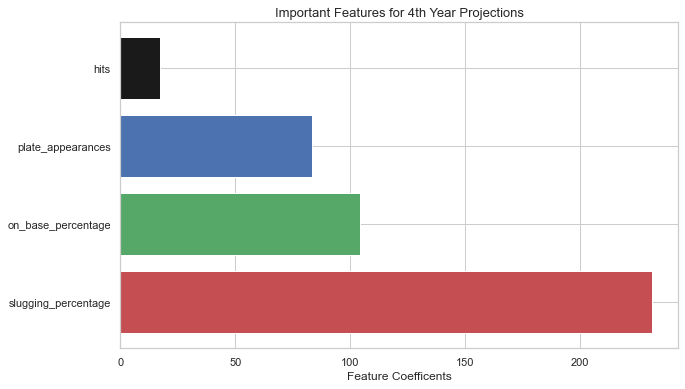

In [464]:
fig,ax=plt.subplots(figsize=(10,6))
my_colors = 'rgbkymc' 
ax.barh(next_years.Features,next_years.Feature_Coefficent,color=my_colors)
ax.set_xlabel('Feature Coefficents',fontsize=12)
ax.set_title('Important Features for 4th Year Projections',fontsize=13)

In [465]:
fig.savefig('Feature_Coefficients_4th_Season_Projections.png',bbox_inches='tight')

<ipython-input-467-774792b02228>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.barh(two_years.Features,two_years.Feature_Coefficent,color=my_colors)


Text(0.5, 1.0, 'Important Features for 5th Year Projections')

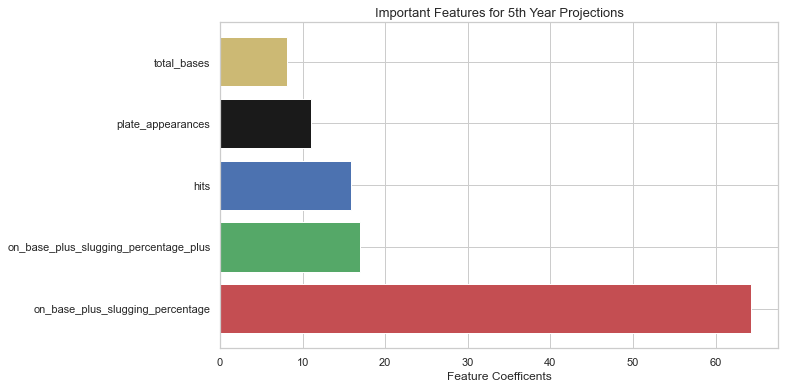

In [467]:
fig,ax=plt.subplots(figsize=(10,6))
my_colors = 'rgbkymc' 
ax.barh(two_years.Features,two_years.Feature_Coefficent,color=my_colors)
ax.set_xlabel('Feature Coefficents',fontsize=12)
ax.set_title('Important Features for 5th Year Projections',fontsize=13)

In [468]:
fig.savefig('Feature_Coefficients_5th_Season_Projections.png',bbox_inches='tight')

<ipython-input-469-620faf40962e>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.barh(three_years.Features,three_years.Feature_Coefficent,color=my_colors)


Text(0.5, 1.0, 'Important Features for 6th Year Projections')

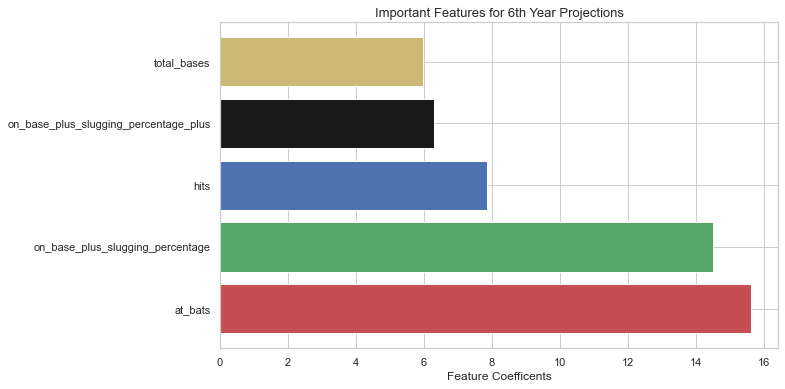

In [469]:
fig,ax=plt.subplots(figsize=(10,6))
my_colors = 'rgbkymc' 
ax.barh(three_years.Features,three_years.Feature_Coefficent,color=my_colors)
ax.set_xlabel('Feature Coefficents',fontsize=12)
ax.set_title('Important Features for 6th Year Projections',fontsize=13)

In [470]:
fig.savefig('Feature_Coefficients_6th_Season_Projections.png',bbox_inches='tight')

In [326]:
Two_Season_coeff_df.sort_values('Feature_Coefficent',ascending=False)

,Features,Feature_Coefficent
12,on_base_plus_slugging_percentage,64.337139
13,on_base_plus_slugging_percentage_plus,16.972105
8,hits,15.813968
14,plate_appearances,10.980059
19,total_bases,8.144537
15,runs_batted_in,5.203134
24,Max_OPS+,2.320107
20,triples,1.269114
26,Height,0.992810
22,birth_year,0.821570


In [327]:
Three_Season_coeff_df.sort_values('Feature_Coefficent',ascending=False)

,Features,Feature_Coefficent
2,at_bats,15.631425
12,on_base_plus_slugging_percentage,14.495377
8,hits,7.854195
13,on_base_plus_slugging_percentage_plus,6.289335
19,total_bases,5.970789
3,bases_on_balls,5.493982
9,home_runs,3.125478
17,sacrifice_hits,2.340568
16,sacrifice_flies,2.012334
5,doubles,1.597306


In [476]:
preds_4th_year=[]
preds_5th_year=[]
preds_6th_year=[]
for i in range (len(preds)):
    preds_4th_year.append(preds[i][0])
    preds_5th_year.append(preds[i][1])
    preds_6th_year.append(preds[i][2])

In [480]:
preds[2]

array([108.48640725, 106.86733451, 103.65358731])

Text(0.5, 1.0, 'Residuals Plot for 4th Year Projections')

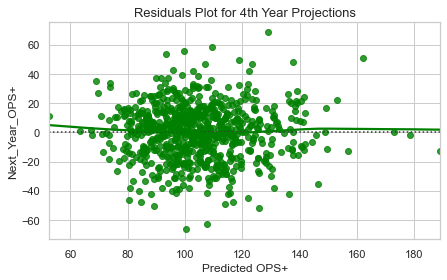

In [507]:
fig,ax=plt.subplots(figsize=(7,4))
sns.residplot(x=preds_4th_year,y=Y['Next_Year_OPS+'],lowess=True,ax=ax,color='green')
ax.set_xlabel('Predicted OPS+',fontsize=12)
ax.set_title('Residuals Plot for 4th Year Projections',fontsize=13)

In [508]:
fig.savefig('Residuals_Plot_for_4th_Year_Projections.png')

Text(0.5, 1.0, 'Residuals Plot for 5th Year Projections')

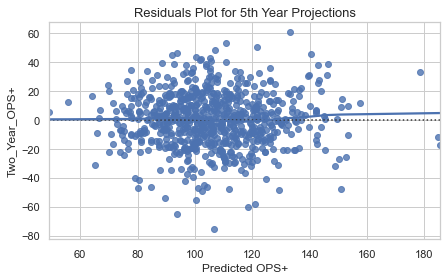

In [509]:
fig,ax=plt.subplots(figsize=(7,4))
sns.residplot(x=preds_5th_year,y=Y['Two_Year_OPS+'],lowess=True,ax=ax)
ax.set_xlabel('Predicted OPS+',fontsize=12)
ax.set_title('Residuals Plot for 5th Year Projections',fontsize=13)

In [510]:
fig.savefig('Residuals_Plot_for_5th_Year_Projections.png')

Text(0.5, 1.0, 'Residuals Plot for 6th Year Projections')

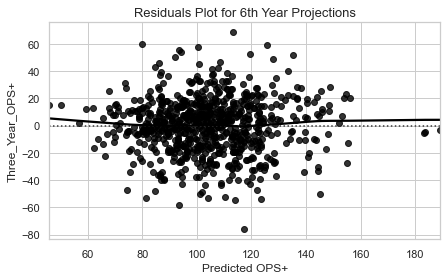

In [511]:
fig,ax=plt.subplots(figsize=(7,4))
sns.residplot(x=preds_6th_year,y=Y['Three_Year_OPS+'],lowess=True,color='black',ax=ax)
ax.set_xlabel('Predicted OPS+',fontsize=12)
ax.set_title('Residuals Plot for 6th Year Projections',fontsize=13)

In [512]:
fig.savefig('Residuals_Plot_for_6th_Year_Projections.png')

# Lasso Model

In [334]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.01,max_iter=100000)
wrapper_lasso=RegressorChain(lasso,order=[0,1,2])
wrapper_lasso.fit(X,Y)

RegressorChain(base_estimator=Lasso(alpha=0.01, max_iter=100000),
               order=[0, 1, 2])

In [335]:
lasso_preds= wrapper_lasso.predict(X)
mae = metrics.mean_absolute_error(Y, lasso_preds)
mse = metrics.mean_squared_error(Y, lasso_preds)
rmse = np.sqrt(metrics.mean_squared_error(Y, lasso_preds))

print('Lasso Mean Absolute Error:', mae )
print('Lasso Mean Squared Error:',  mse)
print('Lasso Root Mean Squared Error:' , rmse)

Lasso Mean Absolute Error: 15.1101150993955
Lasso Mean Squared Error: 373.7349858757784
Lasso Root Mean Squared Error: 19.33222661453611


# Ridge Model

In [340]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=.001)
ridge_wrapper=RegressorChain(ridge,order=[0,1,2])
ridge_wrapper.fit(X,Y)

RegressorChain(base_estimator=Ridge(alpha=0.001), order=[0, 1, 2])

In [341]:
ridge_preds= ridge_wrapper.predict(X)
mae = metrics.mean_absolute_error(Y, ridge_preds)
mse = metrics.mean_squared_error(Y, ridge_preds)
rmse = np.sqrt(metrics.mean_squared_error(Y, ridge_preds))

print('Ridge Mean Absolute Error:', mae )
print('Ridge Mean Squared Error:',  mse)
print('Ridge Root Mean Squared Error:' , rmse)

Ridge Mean Absolute Error: 15.093902256588242
Ridge Mean Squared Error: 372.826356600136
Ridge Root Mean Squared Error: 19.30871193529325


# Deep Learning Models

In [342]:
import tensorflow as tf
model = Sequential()
model.add(Dense(64, input_dim=31, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,kernel_initializer='he_uniform'))
model.summary()
model.compile(
    optimizer=Adam(),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()])
early_stop = EarlyStopping(monitor='val_loss',patience=3)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 195       
Total params: 2,243
Trainable params: 2,243
Non-trainable params: 0
_________________________________________________________________


In [343]:
history = model.fit(X, Y,
                    batch_size=15,
                    epochs=500,
                    verbose=1,
                    validation_split=.2,
                   callbacks=[early_stop])

Epoch 1/500
40/40 [==============================] - 0s 3ms/step - loss: 11693.9199 - root_mean_squared_error: 108.1384 - val_loss: 10867.0732 - val_root_mean_squared_error: 104.2453
Epoch 2/500
40/40 [==============================] - 0s 896us/step - loss: 11270.8154 - root_mean_squared_error: 106.1641 - val_loss: 10412.6846 - val_root_mean_squared_error: 102.0426
Epoch 3/500
40/40 [==============================] - 0s 996us/step - loss: 10735.8711 - root_mean_squared_error: 103.6141 - val_loss: 9760.5107 - val_root_mean_squared_error: 98.7953
Epoch 4/500
40/40 [==============================] - 0s 887us/step - loss: 9956.4541 - root_mean_squared_error: 99.7820 - val_loss: 8868.8086 - val_root_mean_squared_error: 94.1743
Epoch 5/500
40/40 [==============================] - 0s 946us/step - loss: 8915.5498 - root_mean_squared_error: 94.4222 - val_loss: 7759.9629 - val_root_mean_squared_error: 88.0907
Epoch 6/500
40/40 [==============================] - 0s 1ms/step - loss: 7727.9248 - ro

40/40 [==============================] - 0s 986us/step - loss: 871.0500 - root_mean_squared_error: 29.5136 - val_loss: 877.9149 - val_root_mean_squared_error: 29.6296
Epoch 47/500
40/40 [==============================] - 0s 950us/step - loss: 860.6290 - root_mean_squared_error: 29.3365 - val_loss: 857.0850 - val_root_mean_squared_error: 29.2760
Epoch 48/500
40/40 [==============================] - 0s 875us/step - loss: 822.3786 - root_mean_squared_error: 28.6771 - val_loss: 835.9127 - val_root_mean_squared_error: 28.9122
Epoch 49/500
40/40 [==============================] - 0s 953us/step - loss: 840.3944 - root_mean_squared_error: 28.9896 - val_loss: 821.6564 - val_root_mean_squared_error: 28.6645
Epoch 50/500
40/40 [==============================] - 0s 956us/step - loss: 806.3391 - root_mean_squared_error: 28.3961 - val_loss: 799.9423 - val_root_mean_squared_error: 28.2832
Epoch 51/500
40/40 [==============================] - 0s 857us/step - loss: 803.0178 - root_mean_squared_error: 2

Epoch 92/500
40/40 [==============================] - 0s 1ms/step - loss: 561.6469 - root_mean_squared_error: 23.6991 - val_loss: 509.8257 - val_root_mean_squared_error: 22.5793
Epoch 93/500
40/40 [==============================] - 0s 2ms/step - loss: 543.2312 - root_mean_squared_error: 23.3073 - val_loss: 511.6806 - val_root_mean_squared_error: 22.6204
Epoch 94/500
40/40 [==============================] - 0s 2ms/step - loss: 560.7982 - root_mean_squared_error: 23.6812 - val_loss: 501.8725 - val_root_mean_squared_error: 22.4025
Epoch 95/500
40/40 [==============================] - 0s 1ms/step - loss: 567.7442 - root_mean_squared_error: 23.8274 - val_loss: 502.8310 - val_root_mean_squared_error: 22.4239
Epoch 96/500
40/40 [==============================] - 0s 1ms/step - loss: 561.2529 - root_mean_squared_error: 23.6908 - val_loss: 507.1933 - val_root_mean_squared_error: 22.5210
Epoch 97/500
40/40 [==============================] - 0s 2ms/step - loss: 532.0739 - root_mean_squared_error: 

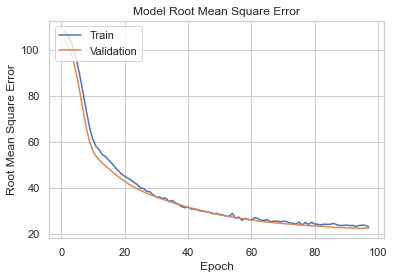

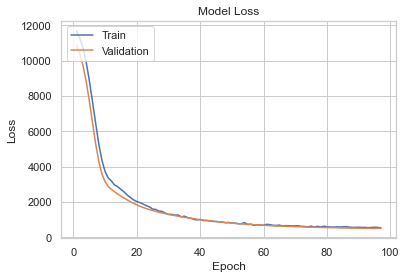

In [345]:
plotLearningCurve(history,97)

# Stat Testing based on Model Analysis

In [346]:
df.head()

,season,assists,at_bats,bases_on_balls,batting_average,doubles,games,games_started,hits,home_runs,intentional_bases_on_balls,on_base_percentage,on_base_plus_slugging_percentage,on_base_plus_slugging_percentage_plus,plate_appearances,runs_batted_in,sacrifice_flies,sacrifice_hits,slugging_percentage,total_bases,triples,weight,birth_year,Age,Max_OPS+,Best_season,Height,Cumulative_Games_started,Cluster,Relative_performance_to_cluster_avg,Next_Year_OPS+,Two_Year_OPS+,Three_Year_OPS+,Elite_Slugging
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,2013.0,76.000000,365.333333,54.333333,0.233000,15.333333,113.666667,108.666667,87.000000,8.666667,5.666667,0.338000,0.681667,93.000000,433.333333,43.000000,4.666667,4.333333,0.344000,129.666667,0.666667,225.0,1981.0,32.0,118.0,0.333333,6.166667,230.333333,2.0,0.877358,113.0,63.0,104.0,0.000000
A.J. Pierzynski,2002.0,43.333333,436.000000,17.666667,0.300333,33.000000,127.000000,117.000000,131.333333,8.000000,5.666667,0.338667,0.786667,105.666667,469.666667,59.333333,3.666667,1.666667,0.448000,195.666667,3.666667,250.0,1976.0,26.0,120.0,0.000000,6.250000,224.333333,1.0,1.035948,86.0,90.0,94.0,0.333333
AJ Pollock,2014.0,7.000000,439.000000,35.000000,0.295333,28.666667,123.000000,103.666667,130.333333,11.666667,0.333333,0.347333,0.815333,121.333333,480.666667,46.000000,3.333333,1.333333,0.468333,205.333333,5.666667,210.0,1987.0,27.0,134.0,0.333333,6.083333,193.666667,1.0,1.189542,100.0,108.0,108.0,0.666667
Aaron Boone,1999.0,168.000000,314.666667,23.000000,0.282333,19.000000,93.666667,86.000000,88.666667,9.333333,1.333333,0.345333,0.786667,98.333333,353.000000,47.666667,3.666667,3.333333,0.441667,140.333333,2.333333,190.0,1973.0,26.0,113.0,0.000000,6.166667,161.666667,3.0,1.035088,109.0,93.0,105.0,0.333333
Aaron Hicks,2014.0,7.333333,273.000000,31.333333,0.221000,10.000000,82.333333,77.333333,61.333333,6.666667,0.666667,0.307667,0.644333,79.000000,309.333333,26.000000,1.666667,2.000000,0.336667,95.333333,2.000000,205.0,1989.0,25.0,127.0,0.000000,6.083333,149.000000,3.0,0.831579,65.0,122.0,127.0,0.000000


In [229]:
df.groupby('slugging_percentage').mean()['Next_Year_OPS+']

slugging_percentage
0.281000     98.000000
0.284000     95.000000
0.286000     64.000000
0.294333     75.000000
0.296000     70.000000
0.297333    100.000000
0.298000    117.000000
0.302000     77.000000
0.302333     87.000000
0.303333    110.000000
0.307667     79.000000
0.308000     92.000000
0.310333     50.000000
0.311333     66.000000
0.314333    108.000000
0.316667     85.500000
0.317333    112.000000
0.320000     59.000000
0.321667     92.000000
0.322667     49.000000
0.324333    107.000000
0.325000     87.000000
0.325667     37.000000
0.326333     96.000000
0.326667     96.000000
0.327333     94.000000
0.328000     61.000000
0.328333     82.000000
0.329000     66.000000
0.329667     55.000000
0.330667     34.000000
0.331000     87.000000
0.333000     66.000000
0.333667     68.000000
0.334333     92.000000
0.334667     76.000000
0.335667     73.000000
0.336000     97.500000
0.336333    101.000000
0.336333     77.000000
0.336667     65.000000
0.337667    101.000000
0.338000     8

In [230]:
df['slugging_percentage'].describe()

count    738.000000
mean       0.420407
std        0.057170
min        0.281000
25%        0.379083
50%        0.417833
75%        0.458250
max        0.612667
Name: slugging_percentage, dtype: float64

In [245]:
elite_slugging_mean=df.loc[df.slugging_percentage>.46,'Next_Year_OPS+'].mean()
elite_slugging_std=df.loc[df.slugging_percentage>.46,'Next_Year_OPS+'].std()
elite_slugging_len=len(df.loc[df.slugging_percentage>.46,'Next_Year_OPS+'])

In [246]:
gen_pop_mean=df.loc[:,'Next_Year_OPS+'].mean()
gen_pop_std=df.loc[:,'Next_Year_OPS+'].std()
gen_pop_len=len(df.loc[:,'Next_Year_OPS+'])

# One Sample Population Mean Test
## Ho u_elite_slugging=u_gen_pop
## Ho u_elite_slugging≠u_gen_pop
## assuming α=.05

In [249]:
num=elite_slugging_mean-gen_pop_mean
denom=gen_pop_std/np.sqrt(elite_slugging_len)
Test_stat=num/denom
Test_stat

9.436071505762026

In [251]:
P_val=(1-scs.norm.cdf(Test_stat))/2
P_val

0.0

The p value is approximatly zero thus much smaller than our set threshold of .05. 
Thus, we reject the null hypothesis proving that an elite slugging rate does influence
future offensive success. 

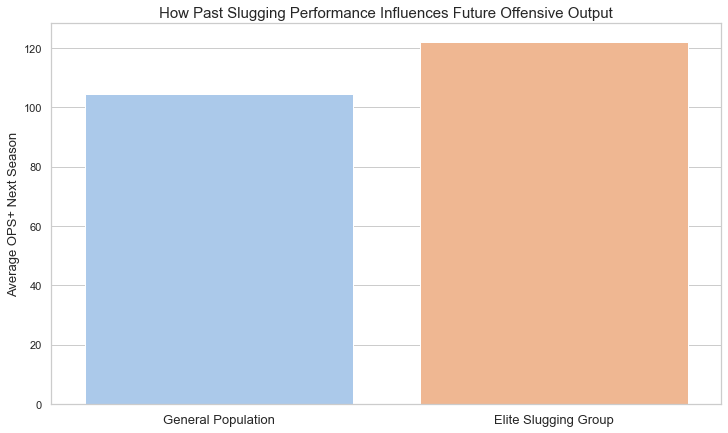

In [267]:
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(x=['General Population','Elite Slugging Group'],y=[gen_pop_mean,elite_slugging_mean],palette='pastel',ax=ax)
ax.set_ylabel('Average OPS+ Next Season',fontsize=13)
ax.set_title('How Past Slugging Performance Influences Future Offensive Output',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=13)

In [268]:
fig.savefig('How_Past_Slugging_Performance_Influences_Future_Offensive_Output.png')

In [355]:
m,b=np.polyfit(df.on_base_plus_slugging_percentage_plus,df['Two_Year_OPS+'],1)
x_ax=df.on_base_plus_slugging_percentage_plus
y_ax=df['Two_Year_OPS+']

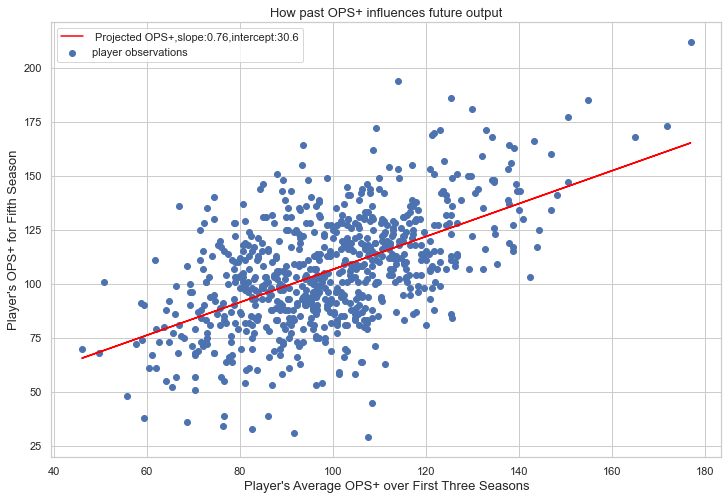

In [372]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(x_ax,y_ax,label='player observations')
ax.plot(x_ax,m*x_ax+b,color='red',label=f' Projected OPS+,slope:{round(m,2)},intercept:{round(b,1)}')
ax.set_ylabel('Player\'s OPS+ for Fifth Season',fontsize=13)
ax.set_xlabel('Player\'s Average OPS+ over First Three Seasons',fontsize=13)
ax.set_title('How past OPS+ influences future output',fontsize=13)
ax.legend()

In [351]:
scs.pearsonr(df.on_base_plus_slugging_percentage_plus,df['Two_Year_OPS+'])

(0.5544157900995612, 1.0619275671990079e-60)

In [357]:
m

0.760697483901468

In [358]:
b

30.5511142452493

In [373]:
fig.savefig('5th_Season_OPS+_projections.png')

In [395]:
df['hits'].describe()

count    738.000000
mean     108.098916
std       33.219189
min       37.666667
25%       82.333333
50%      108.000000
75%      130.666667
max      220.666667
Name: hits, dtype: float64

In [397]:
df['home_runs'].describe()

count    738.000000
mean      11.903342
std        7.576396
min        0.000000
25%        6.000000
50%       10.666667
75%       16.000000
max       42.333333
Name: home_runs, dtype: float64

In [409]:
y1=df.loc[(df['home_runs']<6) &(df['hits']>130),'Three_Year_OPS+'].mean()
#elite contact little power 

In [410]:
y2=df.loc[(df['home_runs']>16) &(df['hits']<108),'Three_Year_OPS+'].mean()
#elite power below average contact

In [411]:
y3=df.loc[(df['home_runs']>10) &(df['hits']>108),'Three_Year_OPS+'].mean()
#Above average power and contact

In [412]:
y4=df.loc[(df['home_runs']>16) &(df['hits']>130),'Three_Year_OPS+'].mean()
#elite power and contact

Text(0.5, 1.0, 'How Different Types of Hitters Perform in 6th Season')

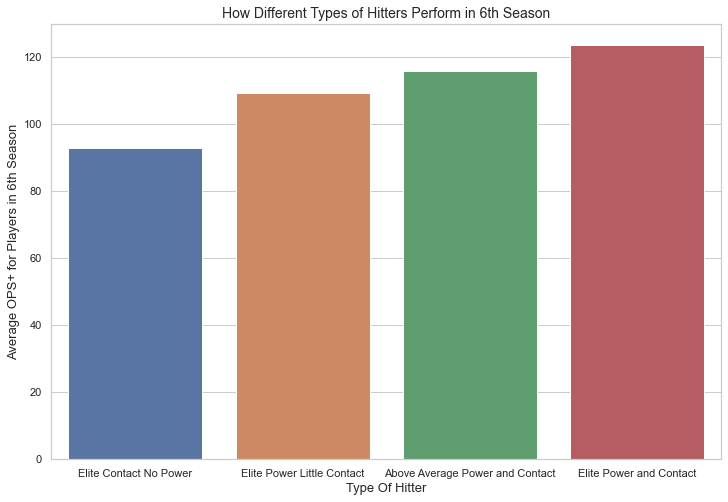

In [436]:
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(x=['Elite Contact No Power',"Elite Power Little Contact",'Above Average Power and Contact','Elite Power and Contact'],y=[y1,y2,y3,y4],ax=ax)
ax.set_xlabel('Type Of Hitter',fontsize=13)
ax.set_ylabel('Average OPS+ for Players in 6th Season',fontsize=13)
ax.set_title('How Different Types of Hitters Perform in 6th Season',fontsize=14)

In [437]:
fig.savefig('How_Different_Types_of_Hitters_Perform_in_6th_Season.png')

In [415]:
df_test=df

In [421]:
df_test['Contact']=np.where((df_test['home_runs']<6) &(df['hits']>130),1,0)
df_test['Power']=np.where((df_test['home_runs']>16) &(df['hits']<108),1,0)
df_test['AA_Power_Contact']=np.where((df_test['home_runs']>10) &(df['hits']>108),1,0)
df_test['Elite_Power_Contact']=np.where((df_test['home_runs']>16) &(df['hits']>130),1,0)

In [422]:
Contact=df_test.loc[df_test['Contact']==1,'Three_Year_OPS+']
Power=df_test.loc[df_test['Power']==1,'Three_Year_OPS+']
Power_Contact=df_test.loc[df_test['AA_Power_Contact']==1,'Three_Year_OPS+']
Elite_Power_Contact=df_test.loc[df_test['Elite_Power_Contact']==1,'Three_Year_OPS+']

In [424]:
scs.f_oneway(Contact,Power,Power_Contact,Elite_Power_Contact)

F_onewayResult(statistic=8.564445032047162, pvalue=1.6033631913747776e-05)